# Dataset for Scientific Paper

### Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats
import plotly
import csv
import random
from scipy.stats import ks_2samp
import polars as pl

In [4]:
print("Polars version:", pl.__version__)

Polars version: 1.8.2


In [5]:
print("Numpy version:", np.__version__)

Numpy version: 1.26.4


### Dataset

In [7]:
pl.Config.set_tbl_rows(200)

polars.config.Config

In [8]:
import os
print(os.getcwd())

C:\Users\Samsung\Documents\DOTTORATO\GitHub\NSE_Lombardy


In [9]:
os.chdir("D:")

Firstly we upload the dataset.

In [11]:
full_data = pl.read_csv('\dataset_buzzi.csv', quote_char='"', low_memory=False, ignore_errors = True)
full_data

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Samsung\AppData\Local\Temp\ipykernel_21452\1825449912.py:1: SyntaxWarning: invalid escape sequence '\d'
  full_data = pl.read_csv('\dataset_buzzi.csv', quote_char='"', low_memory=False, ignore_errors = True)


shape: (985_792, 266)
┌────────┬────────────┬─────────────┬────────────┬───┬─────────┬────────────┬─────────┬────────────┐
│        ┆ Unnamed: 0 ┆ SampleBarco ┆ (C0+C2+C3+ ┆ … ┆ IRT-GSP ┆ N17OHP-GSP ┆ s-17OHP ┆ id         │
│ ---    ┆ ---        ┆ de          ┆ C16+C18:1) ┆   ┆ ---     ┆ ---        ┆ ---     ┆ ---        │
│ i64    ┆ i64        ┆ ---         ┆ /CIT       ┆   ┆ str     ┆ str        ┆ str     ┆ i64        │
│        ┆            ┆ str         ┆ ---        ┆   ┆         ┆            ┆         ┆            │
│        ┆            ┆             ┆ str        ┆   ┆         ┆            ┆         ┆            │
╞════════╪════════════╪═════════════╪════════════╪═══╪═════════╪════════════╪═════════╪════════════╡
│ 0      ┆ 0          ┆ 20LD042587  ┆ 4,74217868 ┆ … ┆ null    ┆ null       ┆ null    ┆ 4216564817 │
│        ┆            ┆             ┆ 560106     ┆   ┆         ┆            ┆         ┆ 612598001  │
│ 1      ┆ 1          ┆ 20LD050321  ┆ 1,16077425 ┆ … ┆ null    ┆ null       ┆ null    ┆ -125680706 │
│        ┆            ┆             ┆ 464949     ┆   ┆         ┆            ┆         ┆ 5201540826 │
│ 2      ┆ 2          ┆ 20LD810743  ┆ 5,99672238 ┆ … ┆ null    ┆ null       ┆ null    ┆ -758913922 │
│        ┆            ┆             ┆ 386756     ┆   ┆         ┆            ┆         ┆ 0525689339 │
│ 3      ┆ 3          ┆ 20LD811192  ┆ 3,36877970 ┆ … ┆ null    ┆ null       ┆ null    ┆ 6738088326 │
│        ┆            ┆             ┆ 016687     ┆   ┆         ┆            ┆         ┆ 278308435  │
│ 4      ┆ 4          ┆ 20LD811194  ┆ 2,64958377 ┆ … ┆ null    ┆ null       ┆ null    ┆ 7169442979 │
│        ┆            ┆             ┆ 100995     ┆   ┆         ┆            ┆         ┆ 252900518  │
│ 5      ┆ 5          ┆ 20LD811195  ┆ 6,10629385 ┆ … ┆ null    ┆ null       ┆ null    ┆ 3392632522 │
│        ┆            ┆             ┆ 048348     ┆   ┆         ┆            ┆         ┆ 250895200  │
│ 6      ┆ 6          ┆ 20LD811196  ┆ 4,77175484 ┆ … ┆ null    ┆ null       ┆ null    ┆ -574936744 │
│        ┆            ┆             ┆ 653654     ┆   ┆         ┆            ┆         ┆ 6410161380 │
│ 7      ┆ 7          ┆ 20LD811197  ┆ 4,23438570 ┆ … ┆ null    ┆ null       ┆ null    ┆ 3815624810 │
│        ┆            ┆             ┆ 269343     ┆   ┆         ┆            ┆         ┆ 54663211   │
│ 8      ┆ 8          ┆ 20LD811198  ┆ 2,83489050 ┆ … ┆ null    ┆ null       ┆ null    ┆ -597288917 │
│        ┆            ┆             ┆ 7156       ┆   ┆         ┆            ┆         ┆ 3496073233 │
│ 9      ┆ 9          ┆ 20LD811199  ┆ 5,15613143 ┆ … ┆ null    ┆ null       ┆ null    ┆ -668549945 │
│        ┆            ┆             ┆ 275795     ┆   ┆         ┆            ┆         ┆ 4087873950 │
│ 10     ┆ 10         ┆ 20LD813080  ┆ 2,19753804 ┆ … ┆ null    ┆ null       ┆ null    ┆ 4158046262 │
│        ┆            ┆             ┆ 690798     ┆   ┆         ┆            ┆         ┆ 932026574  │
│ 11     ┆ 11         ┆ 21LD004707  ┆ 2,69830993 ┆ … ┆ null    ┆ null       ┆ null    ┆ -713586598 │
│        ┆            ┆             ┆ 895117     ┆   ┆         ┆            ┆         ┆ 0081140196 │
│ 12     ┆ 12         ┆ 21LD004751  ┆ 2,02368360 ┆ … ┆ null    ┆ null       ┆ null    ┆ -432741225 │
│        ┆            ┆             ┆ 982441     ┆   ┆         ┆            ┆         ┆ 001180844  │
│ 13     ┆ 13         ┆ 21LD010563  ┆ 3,78341664 ┆ … ┆ null    ┆ null       ┆ null    ┆ -332878899 │
│        ┆            ┆             ┆ 371272     ┆   ┆         ┆            ┆         ┆ 368452739  │
│ 14     ┆ 14         ┆ 21LD010920  ┆ 2,59741955 ┆ … ┆ null    ┆ null       ┆ null    ┆ 6303806952 │
│        ┆            ┆             ┆ 018285     ┆   ┆         ┆            ┆         ┆ 674632649  │
│ 15     ┆ 15         ┆ 21LD010946  ┆ 3,93958283 ┆ … ┆ null    ┆ null       ┆ null    ┆ 3009044529 │
│        ┆            ┆             ┆ 012363     ┆   ┆         ┆            ┆         ┆ 131702537  │
│ 16     ┆ 16         ┆ 21LD015502  ┆ 3

In [12]:
full_data.shape

(985792, 266)

In [13]:
full_data.columns

['',
 'Unnamed: 0',
 'SampleBarcode',
 '(C0+C2+C3+C16+C18:1)/CIT',
 '(C16+C18:1)/C2',
 '17OHP-2TT',
 '2MBC',
 '2MBGLY',
 '2OH GA',
 '3 MCGLY',
 '3OH GA',
 '3OH PA',
 'AA',
 'AAp',
 'AC',
 'ADO',
 'ANDRO',
 'AO',
 'ASA',
 'ASA1',
 'ASA2',
 'ASATotal',
 'Ala',
 'Ala/Cit',
 'Allele 1',
 'Arg',
 'Arg/Ala',
 'Arg/Orn',
 'Arg/Phe',
 'Asa/Arg',
 'BTD',
 'BUTGLY',
 'C0',
 'C0/C16',
 'C0/C16+C18',
 'C10',
 'C10:1',
 'C10:2',
 'C10:2/C10',
 'C12',
 'C12/C10',
 'C12/C8',
 'C12:1',
 'C14',
 'C14-OH',
 'C14/C14:1',
 'C14:1',
 'C14:1/C12:1',
 'C14:1/C14',
 'C14:1/C16',
 'C14:1/C2',
 'C14:2',
 'C16',
 'C16-OH',
 'C16-OH/C16',
 'C16/C2',
 'C16:1',
 'C16:1-OH',
 'C16:1OH\\C17/C2',
 'C16OH/C14',
 'C16OH/C2',
 'C18',
 'C18-OH',
 'C18-OH/C18',
 'C18:1',
 'C18:1-OH',
 'C18:2',
 'C18:2OH',
 'C2',
 'C20',
 'C20/C22',
 'C20/C24',
 'C20/C26',
 'C20:0-LPC',
 'C22',
 'C22/C26',
 'C22:0-LPC',
 'C24',
 'C24-2TT',
 'C24-LPC-2TT',
 'C24/C26',
 'C24:0-LPC',
 'C26',
 'C26-2TT',
 'C26-LPC-2TT',
 'C26:0-LPC',
 'C3',
 'C

## Selezione variabili

In [15]:
full_data = full_data.select(['ASATotal', 'Ala', 'Arg', 'Cit', 'Glu', 'Gly', 'Leu\\Ile\\Pro-OH',
 'Orn', 'MET', 'PHE', 'TYR', 'HCYS', 'Pro', 'Val', 'BTD', 'C0', 'C3', 'C4OH\\C3DC', 'C4', 'C5OH\\C4DC', 'C5', 'C5:1', 'C5DC\\C6OH', 'C6',
 'C6DC', 'C8', 'C8:1', 'C10', 'C10:1', 'C10:2', 'C12', 'C12:1', 'C14', 'C14:1', 'C14:2', 'C14-OH',
 'C16', 'C16:1', 'C16-OH', 'C16:1-OH', 'C18', 'C18:1', 'C18:2', 'C18-OH', 'C18:1-OH', 'C18:2OH', 'C20', 'C22',
 'C24', 'C26', 'SA', 'ADO', 'D-ADO', 'C20:0-LPC', 'NTSH',
 'C22:0-LPC', 'C24:0-LPC', 'C26:0-LPC', 'IRT-GSP', 'TGAL', 'MMA', 'EMA', 'GA',
 '2OH GA', '3OH GA', '3OH PA', 'MCA', 'OROTICO', 'PIVA',
 '2MBC', 'c4-b', 'c4-i', 'DateOfBirth', 'Sex', 'GestationalAge', 'SampleBarcode', 'SamTimeCollected',
 'SamTimeReceived', 'Weight', 'AntibioticsBaby', 'AntibioticsMother', 'Meconium', 'CortisoneBaby',
 'CortisoneMother', 'TyroidMother', 'Premature', 'TooYoung',
 'BabyFed', 'HUFeed', 'MIXFeed', 'ARTFeed', 'TPNFeed', 'ENFeed', 'TPNCARNFeed', 'TPNMCTFeed', 'Hospital', 'BirthMethod',
 'BIS', 'Twins', 'id'])
 

num_col = [ 'ASATotal', 'Ala', 'Arg', 'Cit', 'Glu', 'Gly', 'Leu\\Ile\\Pro-OH',
 'Orn', 'MET', 'PHE', 'TYR', 'HCYS', 'Pro', 'Val', 'BTD', 'C0', 'C3', 'C4OH\\C3DC', 'C4', 'C5OH\\C4DC',
 'C5', 'C5:1', 'C5DC\\C6OH', 'C6', 'C6DC', 'C8', 'C8:1', 'C10',
 'C10:1', 'C10:2', 'C12', 'C12:1', 'C14', 'C14:1', 'C14:2', 'C14-OH', 'C16', 'C16:1', 'C16-OH',
 'C16:1-OH', 'C18', 'C18:1', 'C18:2', 'C18-OH', 'C18:1-OH', 'C18:2OH', 'C20',
 'C22', 'C24', 'C26', 'SA', 'ADO', 'D-ADO', 'C20:0-LPC', 'C22:0-LPC', 'C24:0-LPC', 'C26:0-LPC',
 'IRT-GSP', 'TGAL', 'MMA', 'EMA', 'GA', '2OH GA', '3OH GA', '3OH PA',
 'MCA', 'OROTICO', 'PIVA', '2MBC', 'c4-b', 'c4-i', 'NTSH']
full_data.shape

(985792, 100)

We sorted all the observations from the variable indicating the time of withdrawal.

In [17]:
full_data = full_data.sort('SamTimeCollected')

In [18]:
doppi = full_data['SampleBarcode'].value_counts().filter(pl.col('count') > 1 )['SampleBarcode']


In [19]:
add = full_data.filter(pl.col('SampleBarcode').is_in(doppi.to_list())).filter(pl.col("NTSH").is_not_null())
add.shape

(9, 100)

In [20]:
full_data = full_data.filter(~pl.col('SampleBarcode').is_in(doppi.to_list()))

In [21]:
full_data = pl.concat([full_data, add], how="vertical")
full_data.shape

(985783, 100)

## Doppia virgola

In [23]:
i = 0
for c in num_col:
    num = full_data.filter(pl.col(c).str.contains('[0-9]*,[0-9]*,[0-9]*')).shape[0]
    if num > 0:
        i = i+1
        print(f'La colonna {c} ha {num} righe con due virgole')
i

La colonna ASATotal ha 2001 righe con due virgole
La colonna Ala ha 23597 righe con due virgole
La colonna Arg ha 23581 righe con due virgole
La colonna Cit ha 23401 righe con due virgole
La colonna Glu ha 2000 righe con due virgole
La colonna Gly ha 23600 righe con due virgole
La colonna Leu\Ile\Pro-OH ha 23632 righe con due virgole
La colonna Orn ha 23624 righe con due virgole
La colonna MET ha 23630 righe con due virgole
La colonna PHE ha 23590 righe con due virgole
La colonna TYR ha 23583 righe con due virgole
La colonna HCYS ha 14 righe con due virgole
La colonna Pro ha 23646 righe con due virgole
La colonna Val ha 23635 righe con due virgole
La colonna BTD ha 1650 righe con due virgole
La colonna C0 ha 23622 righe con due virgole
La colonna C3 ha 23619 righe con due virgole
La colonna C4OH\C3DC ha 23870 righe con due virgole
La colonna C4 ha 23878 righe con due virgole
La colonna C5OH\C4DC ha 23866 righe con due virgole
La colonna C5 ha 23948 righe con due virgole
La colonna C5:1

71

In [24]:
data = full_data
data = data.with_columns([pl.when(pl.col(c).str.count_matches(",") >= 2)
      .then(pl.col(c).str.slice(0, pl.col(c).str.find(",") + 3)) 
      .otherwise(pl.col(c)).alias(c) for c in num_col])



In [25]:
for c in num_col:
    #full_data = full_data.with_columns(pl.when((pl.col(c).str.contains('[0-9]*,[0-9]*,[0-9]*'))).then(pl.col(c).str.slice(0, 4)).otherwise(pl.col(c)).alias(c))
    a = data.filter(pl.col(c).str.contains('[0-9]*,[0-9]*,[0-9]*')).shape[0]
    if a > 0:
        print(f'col {c}:{a} valori con doppia virgola')

## Diagnosi

Then we uploaded the file with the diagnosis and rename the variable to be used for the join with the same name of the one in the main dataset.

In [28]:
dis = pl.read_excel('C:/Users/Samsung/Documents/THESIS/Per Gloria.xlsx')
dis = dis.rename({"CODIE NEONATO": "SampleBarcode"})
dis.head()

shape: (5, 3)
┌───────────────┬──────────┬───────────┐
│ SampleBarcode ┆ DIAGNOSI ┆ CATEGORIA │
│ ---           ┆ ---      ┆ ---       │
│ str           ┆ str      ┆ str       │
╞═══════════════╪══════════╪═══════════╡
│ 1600072855    ┆ MTHFR    ┆ AA        │
│ 1600096585    ┆ CBS      ┆ AA        │
│ 19LD032896    ┆ CBS      ┆ AA        │
│ 19LD011001    ┆ CBS      ┆ AA        │
│ 1500121493    ┆ PHE      ┆ AA        │
└───────────────┴──────────┴───────────┘

In [29]:
dis['SampleBarcode']

shape: (209,)
Series: 'SampleBarcode' [str]
[
	"1600072855"
	"1600096585"
	"19LD032896"
	"19LD011001"
	"1500121493"
	"1500186270"
	"1500123770"
	"1620230426"
	"1620399031"
	"1620352265"
	"1600109162"
	"1600285996"
	"1600209466"
	"1600512726"
	"1600914230"
	"1600292888"
	"1600992627"
	"1600600775"
	"1600355712"
	"1600153257"
	"1601000017"
	"1600572584"
	"1600137967"
	"1600739284"
	"1600739291"
	"1600556867"
	"1600495548"
	"1600871991"
	"1600407626"
	"1600789586"
	"1600670044"
	"1600928541"
	"0170023151"
	"1600930278"
	"1600985353"
	"0170107103"
	"0170143187"
	"0170137674"
	"1700295673"
	"1700170352"
	"1700733663"
	"1700131872"
	"1700130608"
	"1700708173"
	"1700562164"
	"1700958585"
	"18L0021429"
	"18L0012423"
	"18L0005533"
	"18L0016249"
	"18L0014462"
	"18L2003612"
	"18LD004809"
	"18LD007116"
	"18LD007985"
	"18LD011301"
	"18LD013957"
	"18LD024642"
	"18LD015198"
	"18LD028885"
	"18LD027102"
	"18LD038565"
	"18LD030642"
	"18LD028897"
	"18LD030751"
	"18LD070208"
	"18LD066806"
	"18LD040554"
	"18LD077278"
	"18LD055381"
	"18LD056662"
	"18LD053789"
	"19LD055355"
	"19LD012922"
	"19LD012228"
	"19LD003327"
	"19LD061283"
	"19LD001151"
	"19LD044122"
	"19LD052511"
	"19LD034280"
	"19LD041064"
	"19LD060025"
	"11LD004479"
	"11LD005096"
	"19LD119357"
	"19LD099458"
	"19LD017796"
	"19LD003399"
	"19LD103538"
	"19LD089434"
	"19LD115476"
	"19LD091211"
	"19LD094713"
	"19LD074514"
	"19LD075230"
	"19LD081424"
	"19LD108489"
	"19LD111310"
	"19LD097482"
	…
	"20LD046259"
	"19LD099927"
	"18LD042548"
	"18LD003024"
	"18LD013998"
	"18LD022938"
	"1600257597"
	"20LD052180"
	"19LD016610"
	"19LD093098"
	"19LD019595"
	"20LD007827"
	"1600249912"
	"18LD020180"
	"19LD042599"
	"20LD053513"
	"20LD808240"
	"20LD808837"
	"1600782778"
	"1600457867"
	"1700932950"
	"18LD075200"
	"18LD070395"
	"18LD081507"
	"19LD022941"
	"19LD043716"
	"1601064651"
	"18LD045190"
	"1700335959"
	"1600489141"
	"1600489202"
	"1600309425"
	"1700193054"
	"19LD023096"
	"1600604346"
	"1600933323"
	"1600824836"
	"18LD041767"
	"18LD038704"
	"1620038237"
	"1600201033"
	"18LD013819"
	"18LD023684"
	"11LD009353"
	" 19LD097729 "
	"19LD102817"
	"19LD094370"
	"1600121676"
	"1620032860"
	"1600512672"
	"0170064659"
	"0170041650"
	"0170132082"
	"18L0014055"
	"19LD039651"
	"19LD008248"
	"19LD050875"
	"11LD009055"
	"19LD114070"
	"20LD007026"
	"20LD009386"
	"20LD029468"
	"20LD806290"
	"20LD808772"
	"1600886346"
	"11LD006628"
	"20LD814140"
	"0170150093"
	"1700850483"
	"1700768610"
	"19LD036855"
	"1600196131"
	"1600710962"
	"0170076614"
	"1700448710"
	"1700157049"
	"1700741354"
	"1700478274"
	"1700602471"
	"1700795722"
	"1700947893"
	"18LD006659"
	"18LD009037"
	"18LD059545"
	"19LD031147"
	"19LD080919"
	"19LD079573"
	"20LD009632"
	"20LD049794"
	"1600626140"
	"20LD045334"
	"1600748637"
	"1600970724"
	"1700596213"
	"18LD017008"
	"19LD048472"
	"19LD029105"
	"20LD024836"
	"20LD024837"
	"18LD045080"
]

In [30]:
dis['DIAGNOSI'].unique()

shape: (30,)
Series: 'DIAGNOSI' [str]
[
	"VLCAD"
	"CIT 1"
	"HPA"
	"PKU"
	"IVA"
	"GA2"
	"CblD"
	"MTHFR"
	"CblA"
	"IBG"
	"GA1"
	"TFP EXITUS"
	"ASA"
	"ARG"
	"CPT2"
	"CIT1"
	"MCAD"
	"ARG1"
	"MMA"
	"PHE"
	"SCAD"
	"CBS"
	"PA"
	"CUD"
	"BKT"
	"CblC"
	"TYR3"
	"CPS1"
	"3MCC"
	"2MBG"
]

CIT 1 and CIT1 represent the same disease. The number of unique diseases appearing in the dataset is 29. \
The features with low consistency and low quality are deleted.

In [32]:
dis = dis.with_columns([pl.col("DIAGNOSI").str.replace(r"CIT 1", "CIT1").alias("DIAGNOSI")])

In [33]:
dis['CATEGORIA'].value_counts()

shape: (5, 2)
┌───────────┬───────┐
│ CATEGORIA ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ SC        ┆ 26    │
│ AA        ┆ 110   │
│ FAO       ┆ 35    │
│ UCD       ┆ 12    │
│ AO        ┆ 26    │
└───────────┴───────┘

'SC' is not a category. It is necessary to imput the right category for each observation with 'SC' as category.

In [35]:
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "IBG").then(pl.col("CATEGORIA").str.replace(r"SC", "AO")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])


In [36]:
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "TYR3").then(pl.col("CATEGORIA").str.replace(r"SC", "AA")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "SCAD").then(pl.col("CATEGORIA").str.replace(r"SC", "FAO")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "CPS1").then(pl.col("CATEGORIA").str.replace(r"SC", "AA")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "3MCC").then(pl.col("CATEGORIA").str.replace(r"SC", "AO")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])


In [37]:
dis['CATEGORIA'].value_counts()

shape: (4, 2)
┌───────────┬───────┐
│ CATEGORIA ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ AO        ┆ 33    │
│ FAO       ┆ 52    │
│ UCD       ┆ 12    │
│ AA        ┆ 112   │
└───────────┴───────┘

In [38]:
dis = dis.rename({"DIAGNOSI": "Diagnosis"})
dis = dis.rename({"CATEGORIA": "Category"})

We then performed a join to merge the data.

In [40]:
data.shape

(985783, 100)

In [41]:
babies_d = data.join(dis, on="SampleBarcode", how="left")
babies_d

shape: (985_783, 102)
┌──────────┬─────────┬─────────┬────────┬───┬───────┬──────────────────────┬───────────┬──────────┐
│ ASATotal ┆ Ala     ┆ Arg     ┆ Cit    ┆ … ┆ Twins ┆ id                   ┆ Diagnosis ┆ Category │
│ ---      ┆ ---     ┆ ---     ┆ ---    ┆   ┆ ---   ┆ ---                  ┆ ---       ┆ ---      │
│ str      ┆ str     ┆ str     ┆ str    ┆   ┆ f64   ┆ i64                  ┆ str       ┆ str      │
╞══════════╪═════════╪═════════╪════════╪═══╪═══════╪══════════════════════╪═══════════╪══════════╡
│ null     ┆ 230,42  ┆ 12,66   ┆ 13,8   ┆ … ┆ 0.0   ┆ 798669216849525467   ┆ null      ┆ null     │
│ null     ┆ 228,77  ┆ 11,44   ┆ 7,49   ┆ … ┆ 0.0   ┆ -3045315683506551317 ┆ null      ┆ null     │
│ null     ┆ 248,25  ┆ 10,12   ┆ 13,88  ┆ … ┆ null  ┆ 5655596528266926376  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 8999108248963732586  ┆ null      ┆ null     │
│ null     ┆ 254,93  ┆ 2,25    ┆ 12,82  ┆ … ┆ 0.0   ┆ -2062742519198422210 ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 3467001463626499211  ┆ null      ┆ null     │
│ null     ┆ 204,82  ┆ 4,27    ┆ 17,81  ┆ … ┆ 0.0   ┆ 5404533278905550421  ┆ null      ┆ null     │
│ null     ┆ 357,81  ┆ 3,92    ┆ 9,23   ┆ … ┆ 0.0   ┆ -7108849192791561097 ┆ null      ┆ null     │
│ null     ┆ 279,2   ┆ 3,14    ┆ 16,42  ┆ … ┆ 0.0   ┆ -8007399401642400209 ┆ null      ┆ null     │
│ null     ┆ 334,23  ┆ 2,55    ┆ 12,12  ┆ … ┆ 0.0   ┆ 8291753707470943964  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 4828165840669196153  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 6524671024842925972  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 7290003871902494665  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 8334662152239453935  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 2701559838426245718  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ -8973680094473528699 ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ -6389631536696753457 ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 3269271657721219149  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ -8760416503613157783 ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 17935725851028301    ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 6022695222053105996  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ -6963249249166698392 ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ -7591932376444582831 ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ -2700099820266017892 ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 4288897486594250678  ┆ null      ┆ null     │
│ null     ┆ 0       ┆ 0       ┆ 0      ┆ … ┆ 0.0   ┆ 2928516856927018644  ┆ null      ┆ null     │
│ null     ┆ 323,415 ┆ 9,835   ┆ 15,21  ┆ … ┆ 0.0   ┆ -4924243677909045048 ┆ null      ┆ null     │
│ null     ┆ 273,18  ┆ 21,7    ┆ 21,62  ┆ … ┆ 0.0   ┆ 1466631020906461301  ┆ null      ┆ null     │
│ null     ┆ 204,04  ┆ 10,805  ┆ 15,065 ┆ … ┆ 0.0   ┆ -4051612118816028339 ┆ null      ┆ null     │
│ null     ┆ 193,28  ┆ 15,95   ┆ 25,26  ┆ … ┆ 0.0   ┆ -6224147610971930503 ┆ null      ┆ null     │
│ null     ┆ 265,66  ┆ 43,03   ┆ 28,1   ┆ … ┆ 0.0   ┆ 4178353816737647132  ┆ null      ┆ null     │
│ null     ┆ 198,52  ┆ 8,21    ┆ 11,86  ┆ … ┆ 0.0   ┆ 7448699820135107656  ┆ null      ┆ null     │
│ null     ┆ 280,69  ┆ 10,82   ┆ 14,86  ┆ … ┆ 0.0   ┆ -3194906354733799552 ┆ null      ┆ null     │
│ null     ┆ 145,39  ┆ 6,31    ┆ 12,46  ┆ … ┆ 0.0   ┆ -406482665783441776  ┆ null      ┆ null     │
│ null     ┆ 297,64  ┆ 8,39    ┆ 9,18   ┆ … ┆ 0.0   ┆ -2049124752551798812 ┆ n

The babies with a positive diagnosis are: 

In [43]:
babies_d.filter(pl.col('Diagnosis') != 'SANO')

shape: (198, 102)
┌──────────┬────────────┬──────────┬─────────┬───┬───────┬─────────────────┬────────────┬──────────┐
│ ASATotal ┆ Ala        ┆ Arg      ┆ Cit     ┆ … ┆ Twins ┆ id              ┆ Diagnosis  ┆ Category │
│ ---      ┆ ---        ┆ ---      ┆ ---     ┆   ┆ ---   ┆ ---             ┆ ---        ┆ ---      │
│ str      ┆ str        ┆ str      ┆ str     ┆   ┆ f64   ┆ i64             ┆ str        ┆ str      │
╞══════════╪════════════╪══════════╪═════════╪═══╪═══════╪═════════════════╪════════════╪══════════╡
│ null     ┆ 179,59     ┆ 7,44     ┆ 13,41   ┆ … ┆ 0.0   ┆ -40998765456508 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 39355           ┆            ┆          │
│ null     ┆ 461,74     ┆ 10,04    ┆ 15,39   ┆ … ┆ 0.0   ┆ -13256962280636 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 4478            ┆            ┆          │
│ null     ┆ 133,96     ┆ 3,92     ┆ 11,07   ┆ … ┆ 0.0   ┆ -63133514887704 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 67286           ┆            ┆          │
│ null     ┆ 208,07     ┆ 4,67     ┆ 13,54   ┆ … ┆ 0.0   ┆ 274062555872480 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 1853            ┆            ┆          │
│ null     ┆ 237,28     ┆ 14,34    ┆ 21,84   ┆ … ┆ 0.0   ┆ 613721680602454 ┆ VLCAD      ┆ FAO      │
│          ┆            ┆          ┆         ┆   ┆       ┆ 1851            ┆            ┆          │
│ null     ┆ 239,43     ┆ 15,58    ┆ 19,39   ┆ … ┆ 0.0   ┆ -58661746129318 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 21952           ┆            ┆          │
│ null     ┆ 309,91     ┆ 17,11    ┆ 12,11   ┆ … ┆ 0.0   ┆ 417642417905153 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 7154            ┆            ┆          │
│ null     ┆ 533,14     ┆ 37,82    ┆ 31,28   ┆ … ┆ 0.0   ┆ 495929097329581 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 375             ┆            ┆          │
│ null     ┆ 305,55     ┆ 5,71     ┆ 15,14   ┆ … ┆ 0.0   ┆ -46228967961418 ┆ MCAD       ┆ FAO      │
│          ┆            ┆          ┆         ┆   ┆       ┆ 12560           ┆            ┆          │
│ null     ┆ 182,15     ┆ 3,87     ┆ 6,69    ┆ … ┆ 0.0   ┆ 716916447096462 ┆ CBS        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 1447            ┆            ┆          │
│ null     ┆ 287,12     ┆ 8,48     ┆ 7,06    ┆ … ┆ 0.0   ┆ 221664808897117 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 1389            ┆            ┆          │
│ null     ┆ 193,97     ┆ 1,86     ┆ 8,89    ┆ … ┆ 0.0   ┆ 381029530438457 ┆ GA1        ┆ AO       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 6457            ┆            ┆          │
│ null     ┆ 193,85     ┆ 12,92    ┆ 22,5    ┆ … ┆ 0.0   ┆ -90087905326664 ┆ MTHFR      ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 49960           ┆            ┆          │
│ null     ┆ 371,72     ┆ 2,43     ┆ 11,81   ┆ … ┆ 0.0   ┆ -48469613830631 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 83456           ┆            ┆          │
│ null     ┆ 219,57     ┆ 10,95    ┆ 12,74   ┆ … ┆ 0.0   ┆ -24110583557192 ┆ MCAD       ┆ FAO      │
│          ┆            ┆          ┆         ┆   ┆       ┆ 2537            ┆            ┆          │
│ null     ┆ 184,91     ┆ 7,38     ┆ 12,81   ┆ … ┆ 0.0   ┆ 322190732210824 ┆ IVA        ┆ AO       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 7528            ┆            ┆          │
│ null     ┆ 195,225    ┆ 3,625    ┆ 5,22    ┆ … ┆ 0.0   ┆ -24471038335736 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆       ┆ 30399           ┆            ┆          │
│ null     ┆ 258,91     ┆ 14,72    ┆ 9,71  

We filled the missing values of the DIAGNOSI with the value 'SANO' which means healthy.

In [45]:
babies_d = babies_d.with_columns(replaced=pl.col("Diagnosis").replace(None, 'HEALTHY'))
babies_d = babies_d.drop('Diagnosis')
babies_d = babies_d.rename({"replaced": "Diagnosis"})
babies_d.group_by('Diagnosis').len()

shape: (30, 2)
┌────────────┬────────┐
│ Diagnosis  ┆ len    │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ PA         ┆ 2      │
│ VLCAD      ┆ 7      │
│ 3MCC       ┆ 3      │
│ CBS        ┆ 3      │
│ ARG1       ┆ 1      │
│ MTHFR      ┆ 1      │
│ IVA        ┆ 3      │
│ SCAD       ┆ 16     │
│ GA2        ┆ 5      │
│ ARG        ┆ 1      │
│ CblA       ┆ 1      │
│ TYR3       ┆ 1      │
│ BKT        ┆ 1      │
│ PHE        ┆ 16     │
│ MCAD       ┆ 12     │
│ 2MBG       ┆ 2      │
│ CIT1       ┆ 9      │
│ CblD       ┆ 1      │
│ CPT2       ┆ 1      │
│ ASA        ┆ 1      │
│ CblC       ┆ 11     │
│ HPA        ┆ 56     │
│ HEALTHY    ┆ 985585 │
│ IBG        ┆ 3      │
│ GA1        ┆ 3      │
│ CUD        ┆ 3      │
│ TFP EXITUS ┆ 3      │
│ CPS1       ┆ 1      │
│ PKU        ┆ 29     │
│ MMA        ┆ 2      │
└────────────┴────────┘

#### Fixing the types

In [47]:
babies_d = babies_d.with_columns(
    pl.col("NTSH").cast(pl.Utf8).str.replace_all(",", ".").cast(pl.Float64)
)


In [48]:
for col in babies_d.columns:
    print('colonna',col,'di tipo', babies_d[col].dtype)

colonna ASATotal di tipo String
colonna Ala di tipo String
colonna Arg di tipo String
colonna Cit di tipo String
colonna Glu di tipo String
colonna Gly di tipo String
colonna Leu\Ile\Pro-OH di tipo String
colonna Orn di tipo String
colonna MET di tipo String
colonna PHE di tipo String
colonna TYR di tipo String
colonna HCYS di tipo String
colonna Pro di tipo String
colonna Val di tipo String
colonna BTD di tipo String
colonna C0 di tipo String
colonna C3 di tipo String
colonna C4OH\C3DC di tipo String
colonna C4 di tipo String
colonna C5OH\C4DC di tipo String
colonna C5 di tipo String
colonna C5:1 di tipo String
colonna C5DC\C6OH di tipo String
colonna C6 di tipo String
colonna C6DC di tipo String
colonna C8 di tipo String
colonna C8:1 di tipo String
colonna C10 di tipo String
colonna C10:1 di tipo String
colonna C10:2 di tipo String
colonna C12 di tipo String
colonna C12:1 di tipo String
colonna C14 di tipo String
colonna C14:1 di tipo String
colonna C14:2 di tipo String
colonna C14-O

In [49]:
#babies_d = babies_d.with_columns(pl.col("Weight").cast(pl.Float64))
for c in num_col:
    babies_d = babies_d.with_columns(
    pl.col(c).cast(pl.Utf8).str.replace_all(",", ".").cast(pl.Float64)
)


In [50]:
babies_d = babies_d.with_columns(
    pl.col("IRT-GSP").cast(pl.Utf8).str.replace_all(",", ".").cast(pl.Float64)
)

In [51]:
babies_d = babies_d.with_columns(babies_d["CortisoneMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Meconium"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["TyroidMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BIS"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BabyFed"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Twins"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["CortisoneBaby"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsBaby"].fill_null("0"))

In [52]:
babies_d = babies_d.with_columns([pl.col("CortisoneMother").cast(pl.Float64).cast(pl.Int8),
    pl.col("AntibioticsMother").cast(pl.Float64).cast(pl.Int8),
    pl.col("Meconium").cast(pl.Float64).cast(pl.Int8),
    pl.col("TyroidMother").cast(pl.Float64).cast(pl.Int8), 
    pl.col("BIS").cast(pl.Float64).cast(pl.Int8), 
    pl.col("BabyFed").cast(pl.Float64).cast(pl.Int8),
    pl.col("Twins").cast(pl.Float64).cast(pl.Int8),
    pl.col("CortisoneBaby").cast(pl.Float64).cast(pl.Int8),
    pl.col("AntibioticsBaby").cast(pl.Float64).cast(pl.Int8),
    pl.col("MIXFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("ARTFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("TPNFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("ENFeed").cast(pl.Float64).cast(pl.Int8), 
    pl.col("TPNCARNFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("TPNMCTFeed").cast(pl.Float64).cast(pl.Int8)
])

In [53]:

babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.replace("T00:00:00.000000", "").alias("SamTimeCollected"))
babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.to_date("%Y-%m-%d"))

In [54]:
babies_d = babies_d.with_columns(
    pl.col("DateOfBirth").str.strptime(pl.Date, "%Y-%m-%d %H:%M:%S%.3f")
)


In [55]:
babies_d = babies_d.rename({"SamTimeCollected": "SamDateCollected"})

In [56]:
babies_d['SamTimeReceived'].unique()

shape: (11_996,)
Series: 'SamTimeReceived' [str]
[
	"2021-11-02 15:05:05.517"
	"2017-11-03 15:19:27.327"
	"2014-12-17 00:00:00.000"
	"2013-09-11 00:00:00.000"
	"2020-06-22 10:51:11.593"
	"2019-09-06 11:30:28.393"
	"2018-07-30 14:11:41.587"
	"2017-12-18 12:04:56.707"
	"2019-09-06 15:16:20.810"
	"2018-10-31 00:00:00.000"
	"2018-08-16 12:31:00.250"
	"2019-05-20 12:50:48.927"
	"2020-03-09 15:03:28.063"
	"2019-06-27 12:10:41.093"
	"2017-11-13 15:02:55.790"
	"2019-01-07 12:48:05.527"
	"2018-01-09 12:20:56.253"
	"2019-12-03 15:15:38.180"
	"2019-09-20 16:01:49.853"
	"2016-10-13 00:00:00.000"
	"2021-07-26 11:53:35.520"
	"2018-07-02 12:23:18.080"
	"2018-07-20 12:01:10.730"
	"2020-08-19 12:18:41.017"
	"2021-11-29 12:26:11.640"
	"2021-01-25 16:27:28.637"
	"2021-05-25 14:55:21.190"
	"2017-03-21 00:00:00.000"
	"2020-02-03 14:51:08.767"
	"2019-10-21 11:14:07.297"
	"2018-02-27 12:37:41.460"
	"2013-03-20 00:00:00.000"
	"2018-06-01 15:14:24.060"
	"2019-02-13 15:12:54.333"
	"2019-05-02 11:24:14.673"
	"2019-08-09 13:58:27.770"
	"2017-04-14 15:15:34.747"
	"2018-08-03 11:06:41.163"
	"2016-02-03 00:00:00.000"
	"2019-07-22 14:38:18.383"
	"2020-07-27 15:28:36.450"
	"2020-01-20 15:15:45.543"
	"2013-12-06 00:00:00.000"
	"2021-08-02 15:03:47.993"
	"2019-10-23 11:07:13.803"
	"2018-02-05 13:54:37.620"
	"2020-07-07 14:16:21.457"
	"2015-12-18 00:00:00.000"
	"2019-06-24 11:43:30.567"
	"2018-08-20 15:21:52.860"
	"2020-08-24 15:39:30.950"
	"2020-03-06 15:33:46.037"
	"2019-03-15 11:25:59.330"
	"2017-04-18 15:21:25.293"
	"2018-07-06 12:00:40.077"
	"2021-03-31 11:27:34.537"
	"2018-04-12 14:43:45.447"
	"2020-05-26 12:51:29.497"
	"2018-07-30 14:42:04.263"
	"2021-01-05 13:23:55.907"
	"2021-02-05 15:18:34.063"
	"2018-11-20 12:41:38.000"
	"2017-04-14 11:24:22.983"
	"2019-05-02 10:35:24.097"
	"2019-12-02 15:46:34.643"
	"2021-03-08 13:04:41.533"
	"2017-07-12 15:44:10.317"
	"2020-10-26 10:35:46.993"
	"2020-03-31 14:28:46.707"
	"2018-10-04 13:11:17.477"
	"2019-07-29 11:47:24.027"
	"2020-09-08 13:15:11.947"
	"2020-06-10 08:48:51.173"
	"2020-08-24 14:24:15.163"
	"2019-04-02 13:30:11.600"
	"2021-12-29 15:49:29.990"
	"2019-11-06 11:57:46.887"
	"2018-07-24 12:21:42.517"
	"2021-07-19 10:35:32.993"
	"2019-02-12 12:05:29.670"
	"2019-07-01 11:39:07.303"
	"2021-02-22 12:02:53.897"
	"2018-10-15 11:46:25.343"
	"2021-07-06 12:00:02.417"
	"2019-06-19 12:31:06.000"
	"2012-09-11 00:00:00.000"
	"2020-07-23 15:17:50.133"
	"2020-08-26 12:04:11.210"
	"2020-09-18 14:54:36.600"
	"2020-02-06 15:26:56.103"
	"2019-04-12 14:57:16.080"
	"2017-07-17 13:57:19.753"
	"2018-10-22 12:16:28.477"
	"2018-10-11 12:43:08.297"
	"2017-10-20 15:26:38.020"
	"2019-01-21 13:28:02.767"
	"2019-09-10 15:31:32.287"
	"2020-10-01 13:12:30.880"
	"2017-11-29 12:09:03.683"
	"2021-06-14 16:08:57.067"
	…
	"2018-01-03 11:13:40.447"
	"2018-06-08 11:40:37.423"
	"2021-05-17 14:18:15.547"
	"2019-02-07 15:37:20.910"
	"2018-07-27 11:40:51.693"
	"2019-10-28 12:26:53.920"
	"2017-04-20 15:14:25.603"
	"2019-05-06 12:34:19.920"
	"2018-03-02 14:49:55.513"
	"2021-03-08 10:34:24.160"
	"2018-05-02 12:55:08.527"
	"2020-11-02 11:03:12.440"
	"2021-10-06 13:19:41.317"
	"2019-02-14 13:16:11.210"
	"2018-01-22 13:13:43.187"
	"2020-03-24 12:02:01.487"
	"2018-11-21 12:05:08.687"
	"2019-03-22 15:11:33.510"
	"2021-05-03 14:54:28.820"
	"2018-11-09 15:23:53.353"
	"2019-12-11 11:36:50.960"
	"2013-05-23 00:00:00.000"
	"2020-11-05 12:40:28.940"
	"2021-08-23 16:09:35.017"
	"2019-12-23 12:50:41.237"
	"2017-12-05 12:33:44.143"
	"2020-09-07 13:17:19.370"
	"2017-10-30 12:36:47.960"
	"2019-01-21 16:00:16.387"
	"2019-02-21 12:21:28.990"
	"2014-09-02 00:00:00.000"
	"2020-11-11 09:34:51.063"
	"2019-06-13 12:15:26.410"
	"2020-08-31 12:57:24.757"
	"2017-03-24 14:39:56.803"
	"2021-12-16 15:38:00.697"
	"2020-05-22 12:04:22.380"
	"2012-06-15 00:00:00.000"
	"2019-12-24 15:36:06.120"
	"2021-05-24 15:45:19.670"
	"2019-05-13 15:16:39.743"
	"2021-07-27 15:25:22.433"
	"2020-05-11 12:09:19.810"
	"2021-08-09 13:04:47.160"
	"2017-03-15 11:39:00.913"
	"2014-12-19 00:00:00.000"
	"20

In [57]:
babies_d = babies_d.with_columns(
    pl.col("SamTimeReceived")
    .str.strptime(pl.Datetime, format= None, strict=True)
    .cast(pl.Date) 
)


In [58]:
babies_d = babies_d.rename({"SamTimeReceived": "SamDateReceived"})

#### GestationalAge
- Are TooYoung all with less than 37 week of gestationalage?

In [60]:
babies_d = babies_d.with_columns(pl.when(pl.col('GestationalAge') < 37).then(1).otherwise(0).alias('Premature'))

In [61]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') < 37))

shape: (122_484, 102)
┌──────────┬────────────┬─────────┬─────────┬───┬───────┬───────────────────┬──────────┬───────────┐
│ ASATotal ┆ Ala        ┆ Arg     ┆ Cit     ┆ … ┆ Twins ┆ id                ┆ Category ┆ Diagnosis │
│ ---      ┆ ---        ┆ ---     ┆ ---     ┆   ┆ ---   ┆ ---               ┆ ---      ┆ ---       │
│ f64      ┆ f64        ┆ f64     ┆ f64     ┆   ┆ i8    ┆ i64               ┆ str      ┆ str       │
╞══════════╪════════════╪═════════╪═════════╪═══╪═══════╪═══════════════════╪══════════╪═══════════╡
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ 34670014636264992 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 11                ┆          ┆           │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ 65246710248429259 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 72                ┆          ┆           │
│ null     ┆ 193.28     ┆ 15.95   ┆ 25.26   ┆ … ┆ 0     ┆ -6224147610971930 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 503               ┆          ┆           │
│ null     ┆ 164.51     ┆ 9.14    ┆ 7.47    ┆ … ┆ 0     ┆ -8087676631629921 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 686               ┆          ┆           │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 0     ┆ -8027301619196848 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 643               ┆          ┆           │
│ null     ┆ 480.64     ┆ 58.35   ┆ 23.81   ┆ … ┆ 0     ┆ -7148762691522595 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 745               ┆          ┆           │
│ null     ┆ 226.4      ┆ 44.95   ┆ 25.76   ┆ … ┆ 0     ┆ 25947020194883810 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 36                ┆          ┆           │
│ null     ┆ 224.83     ┆ 7.12    ┆ 9.6     ┆ … ┆ 0     ┆ -5313653079522532 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 15                ┆          ┆           │
│ null     ┆ 655.09     ┆ 27.68   ┆ 9.57    ┆ … ┆ 0     ┆ -3979712806580280 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 294               ┆          ┆           │
│ null     ┆ 193.46     ┆ 7.14    ┆ 10.55   ┆ … ┆ 1     ┆ 14573002249572481 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 18                ┆          ┆           │
│ null     ┆ 314.25322  ┆ 26.93   ┆ 12.51   ┆ … ┆ 1     ┆ 22984843655374659 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 13                ┆          ┆           │
│ null     ┆ 323.12     ┆ 13.91   ┆ 28.49   ┆ … ┆ 0     ┆ -3977697317442396 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 414               ┆          ┆           │
│ null     ┆ 246.34     ┆ 17.72   ┆ 19.09   ┆ … ┆ 0     ┆ -7954205922551453 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 565               ┆          ┆           │
│ null     ┆ 371.97     ┆ 14.93   ┆ 5.8     ┆ … ┆ 0     ┆ -4263061784894784 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 903               ┆          ┆           │
│ null     ┆ 279297.035 ┆ 59.07   ┆ 23.29   ┆ … ┆ 0     ┆ -7446081674026185 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 12                ┆          ┆           │
│ null     ┆ 252.74     ┆ 11.82   ┆ 10.47   ┆ … ┆ 0     ┆ -2483121181206695 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 066               ┆          ┆           │
│ null     ┆ 257.06     ┆ 16.38   ┆ 14.36   ┆ … ┆ 0     ┆ 75627782772927204 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆       ┆ 35                ┆          ┆           │
│ null     ┆ 124.4      ┆ 1.9     ┆ 6.6

In [62]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') > 37))


shape: (0, 102)
┌──────────┬─────┬─────┬─────┬───┬───────┬─────┬──────────┬───────────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ Twins ┆ id  ┆ Category ┆ Diagnosis │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ ---   ┆ --- ┆ ---      ┆ ---       │
│ f64      ┆ f64 ┆ f64 ┆ f64 ┆   ┆ i8    ┆ i64 ┆ str      ┆ str       │
╞══════════╪═════╪═════╪═════╪═══╪═══════╪═════╪══════════╪═══════════╡
└──────────┴─────┴─────┴─────┴───┴───────┴─────┴──────────┴───────────┘

ok, this is correct

#### Numerical Features

In [65]:
colonne_numeriche = []
cat = ['AntibioticsBaby', 'Hospital','Meconium','CortisoneBaby','AntibioticsMother', 'CortisoneMother','TyroidMother','TPNMCTFeed', 'Premature','TooYoung', 'Sex', 'AnswerIX', 'HUFeed', 'MIXFeed','ARTFeed','TPNFeed','ENFeed','TPNCARNFeed','BIS','BabyFed', 'Twins','TPNMCTFeed']
ciclo = list(filter(lambda x: x not in cat, babies_d.columns))
for col in ciclo:
    if (babies_d[col].dtype == pl.Float64) | (babies_d[col].dtype == pl.Int64) | (babies_d[col].dtype == pl.Int8):
        colonne_numeriche.append(col)

In [66]:
print(f'numeric columns: {len(colonne_numeriche)}')
print(f'categorical columns: {len(cat)}')
print(f'date columns: 3')
print(f'total columns: {babies_d.shape[1]}')

numeric columns: 75
categorical columns: 22
date columns: 3
total columns: 102


Now retains for each id, only the first card that appears in the dataset.

In [68]:
malati = babies_d.filter(pl.col('Diagnosis') != 'HEALTHY')

In [69]:
malati.shape

(198, 102)

In [70]:
id_sick = malati['id']

In [71]:
id_sick.dtype

Int64

In [72]:
babies_d = babies_d.sort('SamDateCollected')

In [73]:
babies = babies_d.unique(subset="id", keep="first")

In [74]:
babies.shape

(791755, 102)

In [75]:
babies_filtered = babies.filter(~pl.col("id").is_in(id_sick))

In [76]:
babies_filtered.shape

(791557, 102)

In [362]:
babies_def = pl.concat([ babies_filtered, malati])

In [364]:
babies_def.shape

(791755, 102)

In [366]:
babies_def['Diagnosis', 'Category'].unique().shape

(30, 2)

### Technical Validation

**Type**

In [82]:
for c in babies_def.columns:
    print(f'La colonna {c} ha tipo {babies_def[c].dtype}')

La colonna ASATotal ha tipo Float64
La colonna Ala ha tipo Float64
La colonna Arg ha tipo Float64
La colonna Cit ha tipo Float64
La colonna Glu ha tipo Float64
La colonna Gly ha tipo Float64
La colonna Leu\Ile\Pro-OH ha tipo Float64
La colonna Orn ha tipo Float64
La colonna MET ha tipo Float64
La colonna PHE ha tipo Float64
La colonna TYR ha tipo Float64
La colonna HCYS ha tipo Float64
La colonna Pro ha tipo Float64
La colonna Val ha tipo Float64
La colonna BTD ha tipo Float64
La colonna C0 ha tipo Float64
La colonna C3 ha tipo Float64
La colonna C4OH\C3DC ha tipo Float64
La colonna C4 ha tipo Float64
La colonna C5OH\C4DC ha tipo Float64
La colonna C5 ha tipo Float64
La colonna C5:1 ha tipo Float64
La colonna C5DC\C6OH ha tipo Float64
La colonna C6 ha tipo Float64
La colonna C6DC ha tipo Float64
La colonna C8 ha tipo Float64
La colonna C8:1 ha tipo Float64
La colonna C10 ha tipo Float64
La colonna C10:1 ha tipo Float64
La colonna C10:2 ha tipo Float64
La colonna C12 ha tipo Float64
La 

In [368]:
babies_def = babies_def.with_columns(pl.col("Sex").cast(pl.Categorical))


C:\Users\Samsung\AppData\Local\Temp\ipykernel_21452\3566837067.py:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  babies_def = babies_def.with_columns(pl.col("Sex").cast(pl.Categorical))


**Premature**

In [370]:
babies_def.filter(pl.col('GestationalAge') <= 36)['Premature'].unique()

shape: (1,)
Series: 'Premature' [i32]
[
	1
]

In [372]:
babies_def.filter(pl.col('GestationalAge') > 36)['Premature'].unique()

shape: (1,)
Series: 'Premature' [i32]
[
	0
]

**DateOfCollection**

In [374]:
babies_def = babies_def.with_columns((pl.col('SamDateCollected') - pl.col('DateOfBirth')).alias('check'))

In [331]:
babies_def

shape: (791_755, 103)
┌──────────┬───────────┬──────────┬────────┬───┬──────────────┬──────────┬───────────┬─────────────┐
│ ASATotal ┆ Ala       ┆ Arg      ┆ Cit    ┆ … ┆ id           ┆ Category ┆ Diagnosis ┆ check       │
│ ---      ┆ ---       ┆ ---      ┆ ---    ┆   ┆ ---          ┆ ---      ┆ ---       ┆ ---         │
│ f64      ┆ f64       ┆ f64      ┆ f64    ┆   ┆ i64          ┆ str      ┆ str       ┆ duration[ms │
│          ┆           ┆          ┆        ┆   ┆              ┆          ┆           ┆ ]           │
╞══════════╪═══════════╪══════════╪════════╪═══╪══════════════╪══════════╪═══════════╪═════════════╡
│ null     ┆ 272.5     ┆ 10.79    ┆ 18.69  ┆ … ┆ -33957828431 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 68086403     ┆          ┆           ┆             │
│ null     ┆ 144.32    ┆ 12.71    ┆ 10.38  ┆ … ┆ -72188625102 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 57532642     ┆          ┆           ┆             │
│ null     ┆ 140.27    ┆ 1.77     ┆ 10.03  ┆ … ┆ 364838553638 ┆ null     ┆ HEALTHY   ┆ 2d          │
│          ┆           ┆          ┆        ┆   ┆ 4795344      ┆          ┆           ┆             │
│ null     ┆ 251.05    ┆ 4.01     ┆ 13.48  ┆ … ┆ 915177565257 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 7558678      ┆          ┆           ┆             │
│ null     ┆ 317.93    ┆ 21.38    ┆ 15.7   ┆ … ┆ 455001774573 ┆ null     ┆ HEALTHY   ┆ 2d          │
│          ┆           ┆          ┆        ┆   ┆ 3185745      ┆          ┆           ┆             │
│ null     ┆ 192.73    ┆ 11.64    ┆ 10.48  ┆ … ┆ 676887099822 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 5907282      ┆          ┆           ┆             │
│ null     ┆ 172.44    ┆ 3.34     ┆ 16.35  ┆ … ┆ -71317015962 ┆ null     ┆ HEALTHY   ┆ 2d          │
│          ┆           ┆          ┆        ┆   ┆ 53409812     ┆          ┆           ┆             │
│ null     ┆ 143.38    ┆ 0.71     ┆ 13.37  ┆ … ┆ 365977325809 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 1041739      ┆          ┆           ┆             │
│ null     ┆ 242.03    ┆ 12.44    ┆ 13.19  ┆ … ┆ -20131048351 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 451653       ┆          ┆           ┆             │
│ null     ┆ 159.92    ┆ 7.32     ┆ 21.69  ┆ … ┆ 335483839376 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 6570694      ┆          ┆           ┆             │
│ null     ┆ 246.06    ┆ 8.73     ┆ 14.87  ┆ … ┆ -51263659268 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 74684029     ┆          ┆           ┆             │
│ null     ┆ 149.18    ┆ 6.64     ┆ 6.02   ┆ … ┆ -47139155318 ┆ null     ┆ HEALTHY   ┆ 2d          │
│          ┆           ┆          ┆        ┆   ┆ 07702161     ┆          ┆           ┆             │
│ null     ┆ 336.36    ┆ 17.85    ┆ 21.88  ┆ … ┆ -91869316092 ┆ null     ┆ HEALTHY   ┆ 2d          │
│          ┆           ┆          ┆        ┆   ┆ 4989556      ┆          ┆           ┆             │
│ null     ┆ 152.06    ┆ 2.24     ┆ 10.96  ┆ … ┆ -59903785552 ┆ null     ┆ HEALTHY   ┆ 2d          │
│          ┆           ┆          ┆        ┆   ┆ 28358509     ┆          ┆           ┆             │
│ null     ┆ 300.68    ┆ 7.19     ┆ 10.02  ┆ … ┆ 908845065618 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆        ┆   ┆ 6028279      ┆          ┆           ┆             │
│ null     ┆ 292.3     ┆ 7.43     ┆ 25.18  ┆ … ┆ -55692994402 ┆ null     ┆ HEALTHY   ┆ 2d          │
│          ┆           ┆          ┆        ┆   ┆ 44032563     ┆          ┆           ┆             │
│ null     ┆ 261.78    ┆ 10.49    ┆ 10.65  ┆ … ┆ 133896328638 ┆ null     ┆ HEALTHY   ┆ 3d          │
│          ┆           ┆          ┆    

In [376]:
babies_def = babies_def.with_columns((pl.col("check") / 86400000).alias("check")) 

In [378]:
babies_def.filter(pl.col('check') >= 4)

shape: (35_878, 103)
┌──────────┬─────────┬──────────┬────────┬───┬───────────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala     ┆ Arg      ┆ Cit    ┆ … ┆ id            ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---     ┆ ---      ┆ ---    ┆   ┆ ---           ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64     ┆ f64      ┆ f64    ┆   ┆ i64           ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═════════╪══════════╪════════╪═══╪═══════════════╪══════════╪═══════════╪══════════════╡
│ null     ┆ 574.7   ┆ 11.89    ┆ 36.85  ┆ … ┆ -585113729310 ┆ null     ┆ HEALTHY   ┆ 17ms         │
│          ┆         ┆          ┆        ┆   ┆ 5412873       ┆          ┆           ┆              │
│ null     ┆ 243.98  ┆ 13.82    ┆ 17.32  ┆ … ┆ 6788402056073 ┆ null     ┆ HEALTHY   ┆ 15ms         │
│          ┆         ┆          ┆        ┆   ┆ 81221         ┆          ┆           ┆              │
│ null     ┆ 209.91  ┆ 28.5     ┆ 17.73  ┆ … ┆ 5449771532744 ┆ null     ┆ HEALTHY   ┆ 23ms         │
│          ┆         ┆          ┆        ┆   ┆ 159878        ┆          ┆           ┆              │
│ null     ┆ 389.51  ┆ 13.22    ┆ 14.32  ┆ … ┆ -731376862685 ┆ null     ┆ HEALTHY   ┆ 16ms         │
│          ┆         ┆          ┆        ┆   ┆ 9406067       ┆          ┆           ┆              │
│ null     ┆ 522.48  ┆ 33.02    ┆ 23.61  ┆ … ┆ 2100496090826 ┆ null     ┆ HEALTHY   ┆ 13ms         │
│          ┆         ┆          ┆        ┆   ┆ 669484        ┆          ┆           ┆              │
│ null     ┆ 311.02  ┆ 15.8     ┆ 13.23  ┆ … ┆ 7137980177710 ┆ null     ┆ HEALTHY   ┆ 8ms          │
│          ┆         ┆          ┆        ┆   ┆ 542637        ┆          ┆           ┆              │
│ null     ┆ 263.69  ┆ 25.14    ┆ 27.07  ┆ … ┆ -673448820136 ┆ null     ┆ HEALTHY   ┆ 15ms         │
│          ┆         ┆          ┆        ┆   ┆ 9406819       ┆          ┆           ┆              │
│ null     ┆ 450.86  ┆ 5.66     ┆ 36.3   ┆ … ┆ -536194481693 ┆ null     ┆ HEALTHY   ┆ 8ms          │
│          ┆         ┆          ┆        ┆   ┆ 0572064       ┆          ┆           ┆              │
│ null     ┆ 360.01  ┆ 15.66    ┆ 12.04  ┆ … ┆ 3503736389698 ┆ null     ┆ HEALTHY   ┆ 4ms          │
│          ┆         ┆          ┆        ┆   ┆ 295947        ┆          ┆           ┆              │
│ null     ┆ 248.2   ┆ 26.69    ┆ 25.76  ┆ … ┆ 3675422242231 ┆ null     ┆ HEALTHY   ┆ 14ms         │
│          ┆         ┆          ┆        ┆   ┆ 715710        ┆          ┆           ┆              │
│ null     ┆ 209.43  ┆ 5.99     ┆ 14.53  ┆ … ┆ 2409727921568 ┆ null     ┆ HEALTHY   ┆ 5ms          │
│          ┆         ┆          ┆        ┆   ┆ 112537        ┆          ┆           ┆              │
│ null     ┆ 218.22  ┆ 4.24     ┆ 9.62   ┆ … ┆ -232576554202 ┆ null     ┆ HEALTHY   ┆ 4ms          │
│          ┆         ┆          ┆        ┆   ┆ 4358522       ┆          ┆           ┆              │
│ null     ┆ 235.73  ┆ 28.28    ┆ 16.1   ┆ … ┆ 4535369487918 ┆ null     ┆ HEALTHY   ┆ 18ms         │
│          ┆         ┆          ┆        ┆   ┆ 131675        ┆          ┆           ┆              │
│ null     ┆ 162.13  ┆ 4.77     ┆ 12.64  ┆ … ┆ 1247353891245 ┆ null     ┆ HEALTHY   ┆ 17ms         │
│          ┆         ┆          ┆        ┆   ┆ 952838        ┆          ┆           ┆              │
│ null     ┆ 180.16  ┆ 14.47    ┆ 11.28  ┆ … ┆ -911238802357 ┆ null     ┆ HEALTHY   ┆ 16ms         │
│          ┆         ┆          ┆        ┆   ┆ 2432986       ┆          ┆           ┆              │
│ null     ┆ 417.19  ┆ 4.22     ┆ 18.34  ┆ … ┆ -532539432567 ┆ null     ┆ HEALTHY   ┆ 15ms         │
│          ┆         ┆          ┆        ┆   ┆ 20868         ┆          ┆           ┆              │
│ null     ┆ 297.7   ┆ 13.88    ┆ 18.23  ┆ … ┆ -755564653136 ┆ null     ┆ HEALTHY   ┆ 13ms         │
│          ┆         ┆          ┆        ┆   ┆ 5782295       ┆          ┆           ┆              │
│ null     ┆ 265.47  ┆ 4.59     ┆ 10.37 

In [380]:
babies_def.filter(pl.col('check') < 1)

shape: (4_653, 103)
┌──────────┬─────────┬────────┬────────┬───┬─────────────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala     ┆ Arg    ┆ Cit    ┆ … ┆ id              ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---     ┆ ---    ┆ ---    ┆   ┆ ---             ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64     ┆ f64    ┆ f64    ┆   ┆ i64             ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═════════╪════════╪════════╪═══╪═════════════════╪══════════╪═══════════╪══════════════╡
│ 0.223    ┆ 427.947 ┆ 4.57   ┆ 13.481 ┆ … ┆ -91488918459861 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 30259           ┆          ┆           ┆              │
│ null     ┆ 786.51  ┆ 35.0   ┆ 12.68  ┆ … ┆ -67641970834455 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 01011           ┆          ┆           ┆              │
│ null     ┆ 322.48  ┆ 24.86  ┆ 13.29  ┆ … ┆ 665519231887615 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 4650            ┆          ┆           ┆              │
│ null     ┆ 444.92  ┆ 7.63   ┆ 12.55  ┆ … ┆ 282314801210553 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 2263            ┆          ┆           ┆              │
│ null     ┆ 433.37  ┆ 18.8   ┆ 21.8   ┆ … ┆ -14562724836055 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 44709           ┆          ┆           ┆              │
│ null     ┆ 117.37  ┆ 1.12   ┆ 20.72  ┆ … ┆ 311241987431458 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 6935            ┆          ┆           ┆              │
│ 0.354    ┆ 410.556 ┆ 11.122 ┆ 16.142 ┆ … ┆ -45109404432227 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 60645           ┆          ┆           ┆              │
│ null     ┆ 477.91  ┆ 4.43   ┆ 25.76  ┆ … ┆ -91925284516429 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 81532           ┆          ┆           ┆              │
│ null     ┆ 137.44  ┆ 11.69  ┆ 19.58  ┆ … ┆ 166447084130690 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 2130            ┆          ┆           ┆              │
│ null     ┆ 427.32  ┆ 8.82   ┆ 15.99  ┆ … ┆ 219871556456951 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 6353            ┆          ┆           ┆              │
│ null     ┆ 277.15  ┆ 22.2   ┆ 13.29  ┆ … ┆ -13977567721951 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 36305           ┆          ┆           ┆              │
│ null     ┆ 330.07  ┆ 3.2    ┆ 13.52  ┆ … ┆ 549130969513754 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 2711            ┆          ┆           ┆              │
│ 0.454    ┆ 635.983 ┆ 5.965  ┆ 13.996 ┆ … ┆ 681515328166456 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 8276            ┆          ┆           ┆              │
│ null     ┆ 262.32  ┆ 13.88  ┆ 22.05  ┆ … ┆ 605913982769263 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 8554            ┆          ┆           ┆              │
│ null     ┆ 255.89  ┆ 13.64  ┆ 10.78  ┆ … ┆ -20994485649925 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 85606           ┆          ┆           ┆              │
│ null     ┆ 69.39   ┆ 8.0    ┆ 11.39  ┆ … ┆ 126855653158977 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 952             ┆          ┆           ┆              │
│ null     ┆ 290.54  ┆ 30.58  ┆ 15.39  ┆ … ┆ -22889968849510 ┆ null     ┆ HEALTHY   ┆ 0ms          │
│          ┆         ┆        ┆        ┆   ┆ 71100           ┆          ┆           ┆              │
│ null     ┆ 362.28  ┆ 15.79  ┆ 17.52  ┆ 

In [408]:
babies_def.filter(((pl.col('check') <= 3) & (pl.col('check') > 1)) | (pl.col('Diagnosis') != 'HEALTHY'))

shape: (748_718, 103)
┌──────────┬───────────┬──────────┬────────┬───┬──────────────┬──────────┬───────────┬─────────────┐
│ ASATotal ┆ Ala       ┆ Arg      ┆ Cit    ┆ … ┆ id           ┆ Category ┆ Diagnosis ┆ check       │
│ ---      ┆ ---       ┆ ---      ┆ ---    ┆   ┆ ---          ┆ ---      ┆ ---       ┆ ---         │
│ f64      ┆ f64       ┆ f64      ┆ f64    ┆   ┆ i64          ┆ str      ┆ str       ┆ duration[ms │
│          ┆           ┆          ┆        ┆   ┆              ┆          ┆           ┆ ]           │
╞══════════╪═══════════╪══════════╪════════╪═══╪══════════════╪══════════╪═══════════╪═════════════╡
│ null     ┆ 272.5     ┆ 10.79    ┆ 18.69  ┆ … ┆ -33957828431 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 68086403     ┆          ┆           ┆             │
│ null     ┆ 144.32    ┆ 12.71    ┆ 10.38  ┆ … ┆ -72188625102 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 57532642     ┆          ┆           ┆             │
│ null     ┆ 140.27    ┆ 1.77     ┆ 10.03  ┆ … ┆ 364838553638 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 4795344      ┆          ┆           ┆             │
│ null     ┆ 251.05    ┆ 4.01     ┆ 13.48  ┆ … ┆ 915177565257 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 7558678      ┆          ┆           ┆             │
│ null     ┆ 317.93    ┆ 21.38    ┆ 15.7   ┆ … ┆ 455001774573 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 3185745      ┆          ┆           ┆             │
│ null     ┆ 192.73    ┆ 11.64    ┆ 10.48  ┆ … ┆ 676887099822 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 5907282      ┆          ┆           ┆             │
│ null     ┆ 172.44    ┆ 3.34     ┆ 16.35  ┆ … ┆ -71317015962 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 53409812     ┆          ┆           ┆             │
│ null     ┆ 143.38    ┆ 0.71     ┆ 13.37  ┆ … ┆ 365977325809 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 1041739      ┆          ┆           ┆             │
│ null     ┆ 242.03    ┆ 12.44    ┆ 13.19  ┆ … ┆ -20131048351 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 451653       ┆          ┆           ┆             │
│ null     ┆ 159.92    ┆ 7.32     ┆ 21.69  ┆ … ┆ 335483839376 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 6570694      ┆          ┆           ┆             │
│ null     ┆ 246.06    ┆ 8.73     ┆ 14.87  ┆ … ┆ -51263659268 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 74684029     ┆          ┆           ┆             │
│ null     ┆ 149.18    ┆ 6.64     ┆ 6.02   ┆ … ┆ -47139155318 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 07702161     ┆          ┆           ┆             │
│ null     ┆ 336.36    ┆ 17.85    ┆ 21.88  ┆ … ┆ -91869316092 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 4989556      ┆          ┆           ┆             │
│ null     ┆ 152.06    ┆ 2.24     ┆ 10.96  ┆ … ┆ -59903785552 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 28358509     ┆          ┆           ┆             │
│ null     ┆ 300.68    ┆ 7.19     ┆ 10.02  ┆ … ┆ 908845065618 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 6028279      ┆          ┆           ┆             │
│ null     ┆ 292.3     ┆ 7.43     ┆ 25.18  ┆ … ┆ -55692994402 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 44032563     ┆          ┆           ┆             │
│ null     ┆ 261.78    ┆ 10.49    ┆ 10.65  ┆ … ┆ 133896328638 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆    

In [540]:
babies_def2 = babies_def.filter((pl.col('check')>1) & (pl.col('check')<4) | (pl.col('Diagnosis') != 'HEALTHY'))

In [541]:
babies_def2.shape

(748718, 103)

**All the observations belong to the right range of years**

In [543]:
from datetime import datetime
babies_def2.filter((pl.col('DateOfBirth') > datetime(2012,1,1)) & (pl.col('DateOfBirth') < datetime(2022,12,31)) |  (pl.col('Diagnosis') != 'HEALTY'))

shape: (748_718, 103)
┌──────────┬───────────┬──────────┬────────┬───┬──────────────┬──────────┬───────────┬─────────────┐
│ ASATotal ┆ Ala       ┆ Arg      ┆ Cit    ┆ … ┆ id           ┆ Category ┆ Diagnosis ┆ check       │
│ ---      ┆ ---       ┆ ---      ┆ ---    ┆   ┆ ---          ┆ ---      ┆ ---       ┆ ---         │
│ f64      ┆ f64       ┆ f64      ┆ f64    ┆   ┆ i64          ┆ str      ┆ str       ┆ duration[ms │
│          ┆           ┆          ┆        ┆   ┆              ┆          ┆           ┆ ]           │
╞══════════╪═══════════╪══════════╪════════╪═══╪══════════════╪══════════╪═══════════╪═════════════╡
│ null     ┆ 272.5     ┆ 10.79    ┆ 18.69  ┆ … ┆ -33957828431 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 68086403     ┆          ┆           ┆             │
│ null     ┆ 144.32    ┆ 12.71    ┆ 10.38  ┆ … ┆ -72188625102 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 57532642     ┆          ┆           ┆             │
│ null     ┆ 140.27    ┆ 1.77     ┆ 10.03  ┆ … ┆ 364838553638 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 4795344      ┆          ┆           ┆             │
│ null     ┆ 251.05    ┆ 4.01     ┆ 13.48  ┆ … ┆ 915177565257 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 7558678      ┆          ┆           ┆             │
│ null     ┆ 317.93    ┆ 21.38    ┆ 15.7   ┆ … ┆ 455001774573 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 3185745      ┆          ┆           ┆             │
│ null     ┆ 192.73    ┆ 11.64    ┆ 10.48  ┆ … ┆ 676887099822 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 5907282      ┆          ┆           ┆             │
│ null     ┆ 172.44    ┆ 3.34     ┆ 16.35  ┆ … ┆ -71317015962 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 53409812     ┆          ┆           ┆             │
│ null     ┆ 143.38    ┆ 0.71     ┆ 13.37  ┆ … ┆ 365977325809 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 1041739      ┆          ┆           ┆             │
│ null     ┆ 242.03    ┆ 12.44    ┆ 13.19  ┆ … ┆ -20131048351 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 451653       ┆          ┆           ┆             │
│ null     ┆ 159.92    ┆ 7.32     ┆ 21.69  ┆ … ┆ 335483839376 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 6570694      ┆          ┆           ┆             │
│ null     ┆ 246.06    ┆ 8.73     ┆ 14.87  ┆ … ┆ -51263659268 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 74684029     ┆          ┆           ┆             │
│ null     ┆ 149.18    ┆ 6.64     ┆ 6.02   ┆ … ┆ -47139155318 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 07702161     ┆          ┆           ┆             │
│ null     ┆ 336.36    ┆ 17.85    ┆ 21.88  ┆ … ┆ -91869316092 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 4989556      ┆          ┆           ┆             │
│ null     ┆ 152.06    ┆ 2.24     ┆ 10.96  ┆ … ┆ -59903785552 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 28358509     ┆          ┆           ┆             │
│ null     ┆ 300.68    ┆ 7.19     ┆ 10.02  ┆ … ┆ 908845065618 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆        ┆   ┆ 6028279      ┆          ┆           ┆             │
│ null     ┆ 292.3     ┆ 7.43     ┆ 25.18  ┆ … ┆ -55692994402 ┆ null     ┆ HEALTHY   ┆ 2ms         │
│          ┆           ┆          ┆        ┆   ┆ 44032563     ┆          ┆           ┆             │
│ null     ┆ 261.78    ┆ 10.49    ┆ 10.65  ┆ … ┆ 133896328638 ┆ null     ┆ HEALTHY   ┆ 3ms         │
│          ┆           ┆          ┆    

In [544]:
babies_def['Hospital'].unique()

shape: (181,)
Series: 'Hospital' [str]
[
	"Ospedale Carlo Poma Rep. Nido"
	"Osp. F. Del Ponte Varese Rep. …
	"Ospedale M. Melloni Rep. NEO. …
	"Ospedale Niguarda Ca' Granda R…
	"Ospedale C. Ondoli Angera Repa…
	"Ospedale Sacra Famiglia di Erb…
	"Osp. S. Antonio Abate di Galla…
	"Spedali Civili di Brescia Rep.…
	"Ospedale Vizzolo Predabissi Re…
	"Casa di CuraCittà di Brescia"
	"Ospedale V. Buzzi Rep. NIDO"
	"Ospedale Valduce Como Rep. NEO…
	"Policlinico San Matteo Rep. NE…
	"Ospedale di Bormio e Sondalo"
	"Ospedale San Raffaele Rep. NID…
	"Ospedale di Circolo  Busto A."
	"Ospedale Civile di Desenzano"
	"A.O. Alessandro Manzoni Lecco …
	"Ospedale Civile di Cantù"
	"Ospedale OGLIO PO NIDO"
	"Ospedale Magenta G.Fornaroli "
	"Istituto di Cura Città di Pavi…
	"Ospedale P.O.C. di Cremona"
	"Ospedale Maggiore di Lodi Rep.…
	"Ospedale Papa Giovanni XXIII R…
	"Ospedale Poliambulanza BS Rep.…
	"Ospedale M. Melloni Rep. NIDO"
	"Policlinico San Matteo Rep. NI…
	"Ospedale  S. Leopoldo di Merat…
	"Ospedale San Paolo Rep. NEO.PA…
	"Ospedale Civile di Vigevano Re…
	"Milan H"
	"Ospedale C. Ondoli Angera"
	"Ospedale San Raffaele"
	"Ospedale M. Melloni Rep. Neo P…
	"A.O. Ospedali Riuniti BG Giova…
	"Ospedale Civile di Codogno Rep…
	"Ospedale Bolognini di Seriate …
	"Ospedale L. Sacco "
	"Ospedale Treviglio-Caravaggio …
	"Ospedale OGLIO PO "
	"Ospedale Niguarda Rep.  Neo Pa…
	"Ospedale di Asola "
	"Spedali Civili di Brescia Rep.…
	"Ospedale Unificato di Broni-St…
	"Ospedale di Bormio e Sondalo R…
	"C.C.R. F.ne Cà Granda O.M. Pol…
	"Ospedale F.M. Passi di Calcina…
	"Ospedale Civile di Desio Rep. …
	"Osp.Pesenti Fenaroli Alzano Lo…
	"Ospedale Civile Mellino Mellin…
	"Ospedale L. Sacco Reparto NIDO"
	"Ospedale di Asola Reparto NIDO"
	"Ospedale San Gerardo Rep. NEO.…
	"Osp. S. Antonio Abate di Galla…
	"P.O. Pieve di Coriano"
	"Ospedale di Melzo S. Maria d/S…
	"Ospedale Civile di Sondrio"
	"I.C.  S. Anna di Brescia Rep. …
	"Ospedale Città di Sesto S.Giov…
	"Ospedale San Gerardo REP. NIDO"
	"Ospedale Treviglio-Caravaggio"
	"Ospedale Sacra Famiglia di Erb…
	"Ospedale di Esine Reparto NIDO"
	"A.O. Spedali Civili di Brescia…
	"Casa di Cura G.B. Mangioni  Le…
	"Ospedale Città di Sesto S.Giov…
	"Ospedale Civile di Desenzano R…
	"Ospedale F.M. Passi di Calcina…
	"F.ne Cà Granda OM Policlinico …
	"Ospedale di Vimercate Rep. NEO…
	"Ospedale Galmarini di Tradate …
	"Ospedale Maggiore di Lodi"
	"Ospedale Poliambulanza BS REP.…
	"IRCCS Policlinico San Donato"
	"Ospedale Maggiore di Crema  NI…
	"Ospedale Civile di Codogno"
	"Ospedale  Borgo Mantovano Repa…
	"Osp.Pesenti Fenaroli Alzano Lo…
	"Ospedale Bolognini di Seriate …
	"Ospedale Carlo Poma Rep. NEO. …
	"Ospedale  di Legnano Reparto N…
	"Ospedale S. Giuseppe Rep. NIDO"
	"Ospedale V. Emanuele III° Cara…
	"A.O. Alessandro Manzoni  Lecco…
	"Ospedale Maggiore di Lodi Rep.…
	"Ospedale Maggiore di Crema"
	"Ospedale M. Melloni Rep. Nido"
	"Ospedale Civile Manerbio"
	"F.ne Cà Granda OM Policlinico …
	"A.O. San Gerardo REP. NEO. PAT…
	"Ospedale di Circolo di RHO"
	"Casa di Cura Beato Matteo di V…
	"Ospedale Niguarda Ca' Granda R…
	"Ospedale V. Buzzi  NEO.  PAT. …
	"A.O.Policlinico San Matteo Rep…
	"Ospedale  Luvini di Cittiglio …
	"Ospedale P.O.C. di Cremona Rep…
	"Ospedale Magenta G.Fornaroli N…
	"Ospedale  Civile di Voghera"
	"VARI"
	"Casa di Cura La Madonnina"
	"Ospedale Poliambulanza BS REP.…
	"Ospedale San Raffaele Rep. NEO…
	"Ospedale S.Carlo Borromeo Rep.…
	"Ospedale V. Buzzi Rep. Neo Pat…
	"Ospedale Civile di Vigevano"
	"Ospedale S. Giuseppe S.p.A."
	"Ospedale  Civile di Voghera Re…
	"A.O. di Circolo di Melegnano"
	"Ospedale Civile di Desio Rep. …
	"Ospedale F. del Ponte Varese R…
	"Ospedale di Circolo di RHO Rep…
	"Ospedale Civile Manerbio Repar…
	"Ospedale di Vimercate"
	"Ospedale Carlo Poma Rep.NIDO"
	"Ospedale Civile di Sondrio Rep…
	"Ospedale La Memoria di Gavardo…
	"F.ne Cà Granda OM Policlinico …
	"Osp. di Circolo Luvini di Citt…
	"Ospedale Niguarda Rep.  NEO. P…
	"A. O. San Paolo"
	"Ospedale P.O.C. di Cr

#### Outliers & Plot of Missing Values

In [546]:
babies_def2.describe()

shape: (9, 104)
┌────────────┬──────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg       ┆ … ┆ id        ┆ Category ┆ Diagnosis ┆ check     │
│ ---        ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---       ┆ ---       │
│ str        ┆ f64      ┆ f64       ┆ f64       ┆   ┆ f64       ┆ str      ┆ str       ┆ str       │
╞════════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ count      ┆ 49923.0  ┆ 748596.0  ┆ 748596.0  ┆ … ┆ 748718.0  ┆ 198      ┆ 748718    ┆ 748718    │
│ null_count ┆ 698795.0 ┆ 122.0     ┆ 122.0     ┆ … ┆ 0.0       ┆ 748520   ┆ 0         ┆ 0         │
│ mean       ┆ 0.286829 ┆ 344.39058 ┆ 10.884468 ┆ … ┆ 1.5172e16 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆ 3         ┆           ┆   ┆           ┆          ┆           ┆ 02000     │
│ std        ┆ 0.175666 ┆ 10779.226 ┆ 570.89861 ┆ … ┆ 5.3248e18 ┆ null     ┆ null      ┆ null      │
│            ┆          ┆ 789       ┆ 6         ┆   ┆           ┆          ┆           ┆           │
│ min        ┆ 0.036    ┆ 0.0       ┆ 0.0       ┆ … ┆ -9.2233e1 ┆ AA       ┆ 2MBG      ┆ 0:00:00   │
│            ┆          ┆           ┆           ┆   ┆ 8         ┆          ┆           ┆           │
│ 25%        ┆ 0.187    ┆ 204.84    ┆ 4.78      ┆ … ┆ -4.5953e1 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆           ┆           ┆   ┆ 8         ┆          ┆           ┆ 02000     │
│ 50%        ┆ 0.248    ┆ 247.94    ┆ 8.12      ┆ … ┆ 1.3720e16 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆           ┆           ┆   ┆           ┆          ┆           ┆ 03000     │
│ 75%        ┆ 0.332    ┆ 302.39    ┆ 13.0      ┆ … ┆ 4.6294e18 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆           ┆           ┆   ┆           ┆          ┆           ┆ 03000     │
│ max        ┆ 2.95     ┆ 8.4010e6  ┆ 493407.17 ┆ … ┆ 9.2233e18 ┆ UCD      ┆ VLCAD     ┆ 0:00:00.0 │
│            ┆          ┆           ┆ 5         ┆   ┆           ┆          ┆           ┆ 19000     │
└────────────┴──────────┴───────────┴───────────┴───┴───────────┴──────────┴───────────┴───────────┘

Some columns have a maximum value that is too large to be realistic

In [548]:
colonne_strane = []
for col in colonne_numeriche:
    max_ = babies_def2[col].max()
    perc = babies_def2.select(pl.col(col).quantile(0.99)).item()
    if max_ > 3*perc:
        colonne_strane.append(col)
colonne_strane

['Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C22:0-LPC',
 'C24:0-LPC',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '3OH GA',
 'MCA',
 'OROTICO',
 'PIVA',
 'c4-i',
 'NTSH']

In [549]:
# possible solution
copy = babies_def2
for col in colonne_strane:
    perc = copy.select(pl.col(col).quantile(0.99999)).item()
    max_ = copy[col].max()
    value = (max_ - perc)/3
    copy = copy.with_columns(pl.when(pl.col(col) > perc).then(None).otherwise(pl.col(col)).alias(col))

copy.describe()

shape: (9, 104)
┌────────────┬──────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg       ┆ … ┆ id        ┆ Category ┆ Diagnosis ┆ check     │
│ ---        ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---       ┆ ---       │
│ str        ┆ f64      ┆ f64       ┆ f64       ┆   ┆ f64       ┆ str      ┆ str       ┆ str       │
╞════════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ count      ┆ 49923.0  ┆ 748589.0  ┆ 748589.0  ┆ … ┆ 748718.0  ┆ 198      ┆ 748718    ┆ 748718    │
│ null_count ┆ 698795.0 ┆ 129.0     ┆ 129.0     ┆ … ┆ 0.0       ┆ 748520   ┆ 0         ┆ 0         │
│ mean       ┆ 0.286829 ┆ 329.02139 ┆ 10.183486 ┆ … ┆ 1.5172e16 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆ 9         ┆           ┆   ┆           ┆          ┆           ┆ 02000     │
│ std        ┆ 0.175666 ┆ 4443.7136 ┆ 22.53611  ┆ … ┆ 5.3248e18 ┆ null     ┆ null      ┆ null      │
│            ┆          ┆ 14        ┆           ┆   ┆           ┆          ┆           ┆           │
│ min        ┆ 0.036    ┆ 0.0       ┆ 0.0       ┆ … ┆ -9.2233e1 ┆ AA       ┆ 2MBG      ┆ 0:00:00   │
│            ┆          ┆           ┆           ┆   ┆ 8         ┆          ┆           ┆           │
│ 25%        ┆ 0.187    ┆ 204.84    ┆ 4.78      ┆ … ┆ -4.5953e1 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆           ┆           ┆   ┆ 8         ┆          ┆           ┆ 02000     │
│ 50%        ┆ 0.248    ┆ 247.94    ┆ 8.12      ┆ … ┆ 1.3720e16 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆           ┆           ┆   ┆           ┆          ┆           ┆ 03000     │
│ 75%        ┆ 0.332    ┆ 302.39    ┆ 13.0      ┆ … ┆ 4.6294e18 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆           ┆           ┆   ┆           ┆          ┆           ┆ 03000     │
│ max        ┆ 2.95     ┆ 445301.98 ┆ 4233.88   ┆ … ┆ 9.2233e18 ┆ UCD      ┆ VLCAD     ┆ 0:00:00.0 │
│            ┆          ┆           ┆           ┆   ┆           ┆          ┆           ┆ 19000     │
└────────────┴──────────┴───────────┴───────────┴───┴───────────┴──────────┴───────────┴───────────┘

In [550]:
copy.shape

(748718, 103)

In [551]:
babies_def2 = babies_def2.drop(['id','SampleBarcode'])

In [552]:
babies_def2.shape

(748718, 101)

In [553]:
num_col

['ASATotal',
 'Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'NTSH']

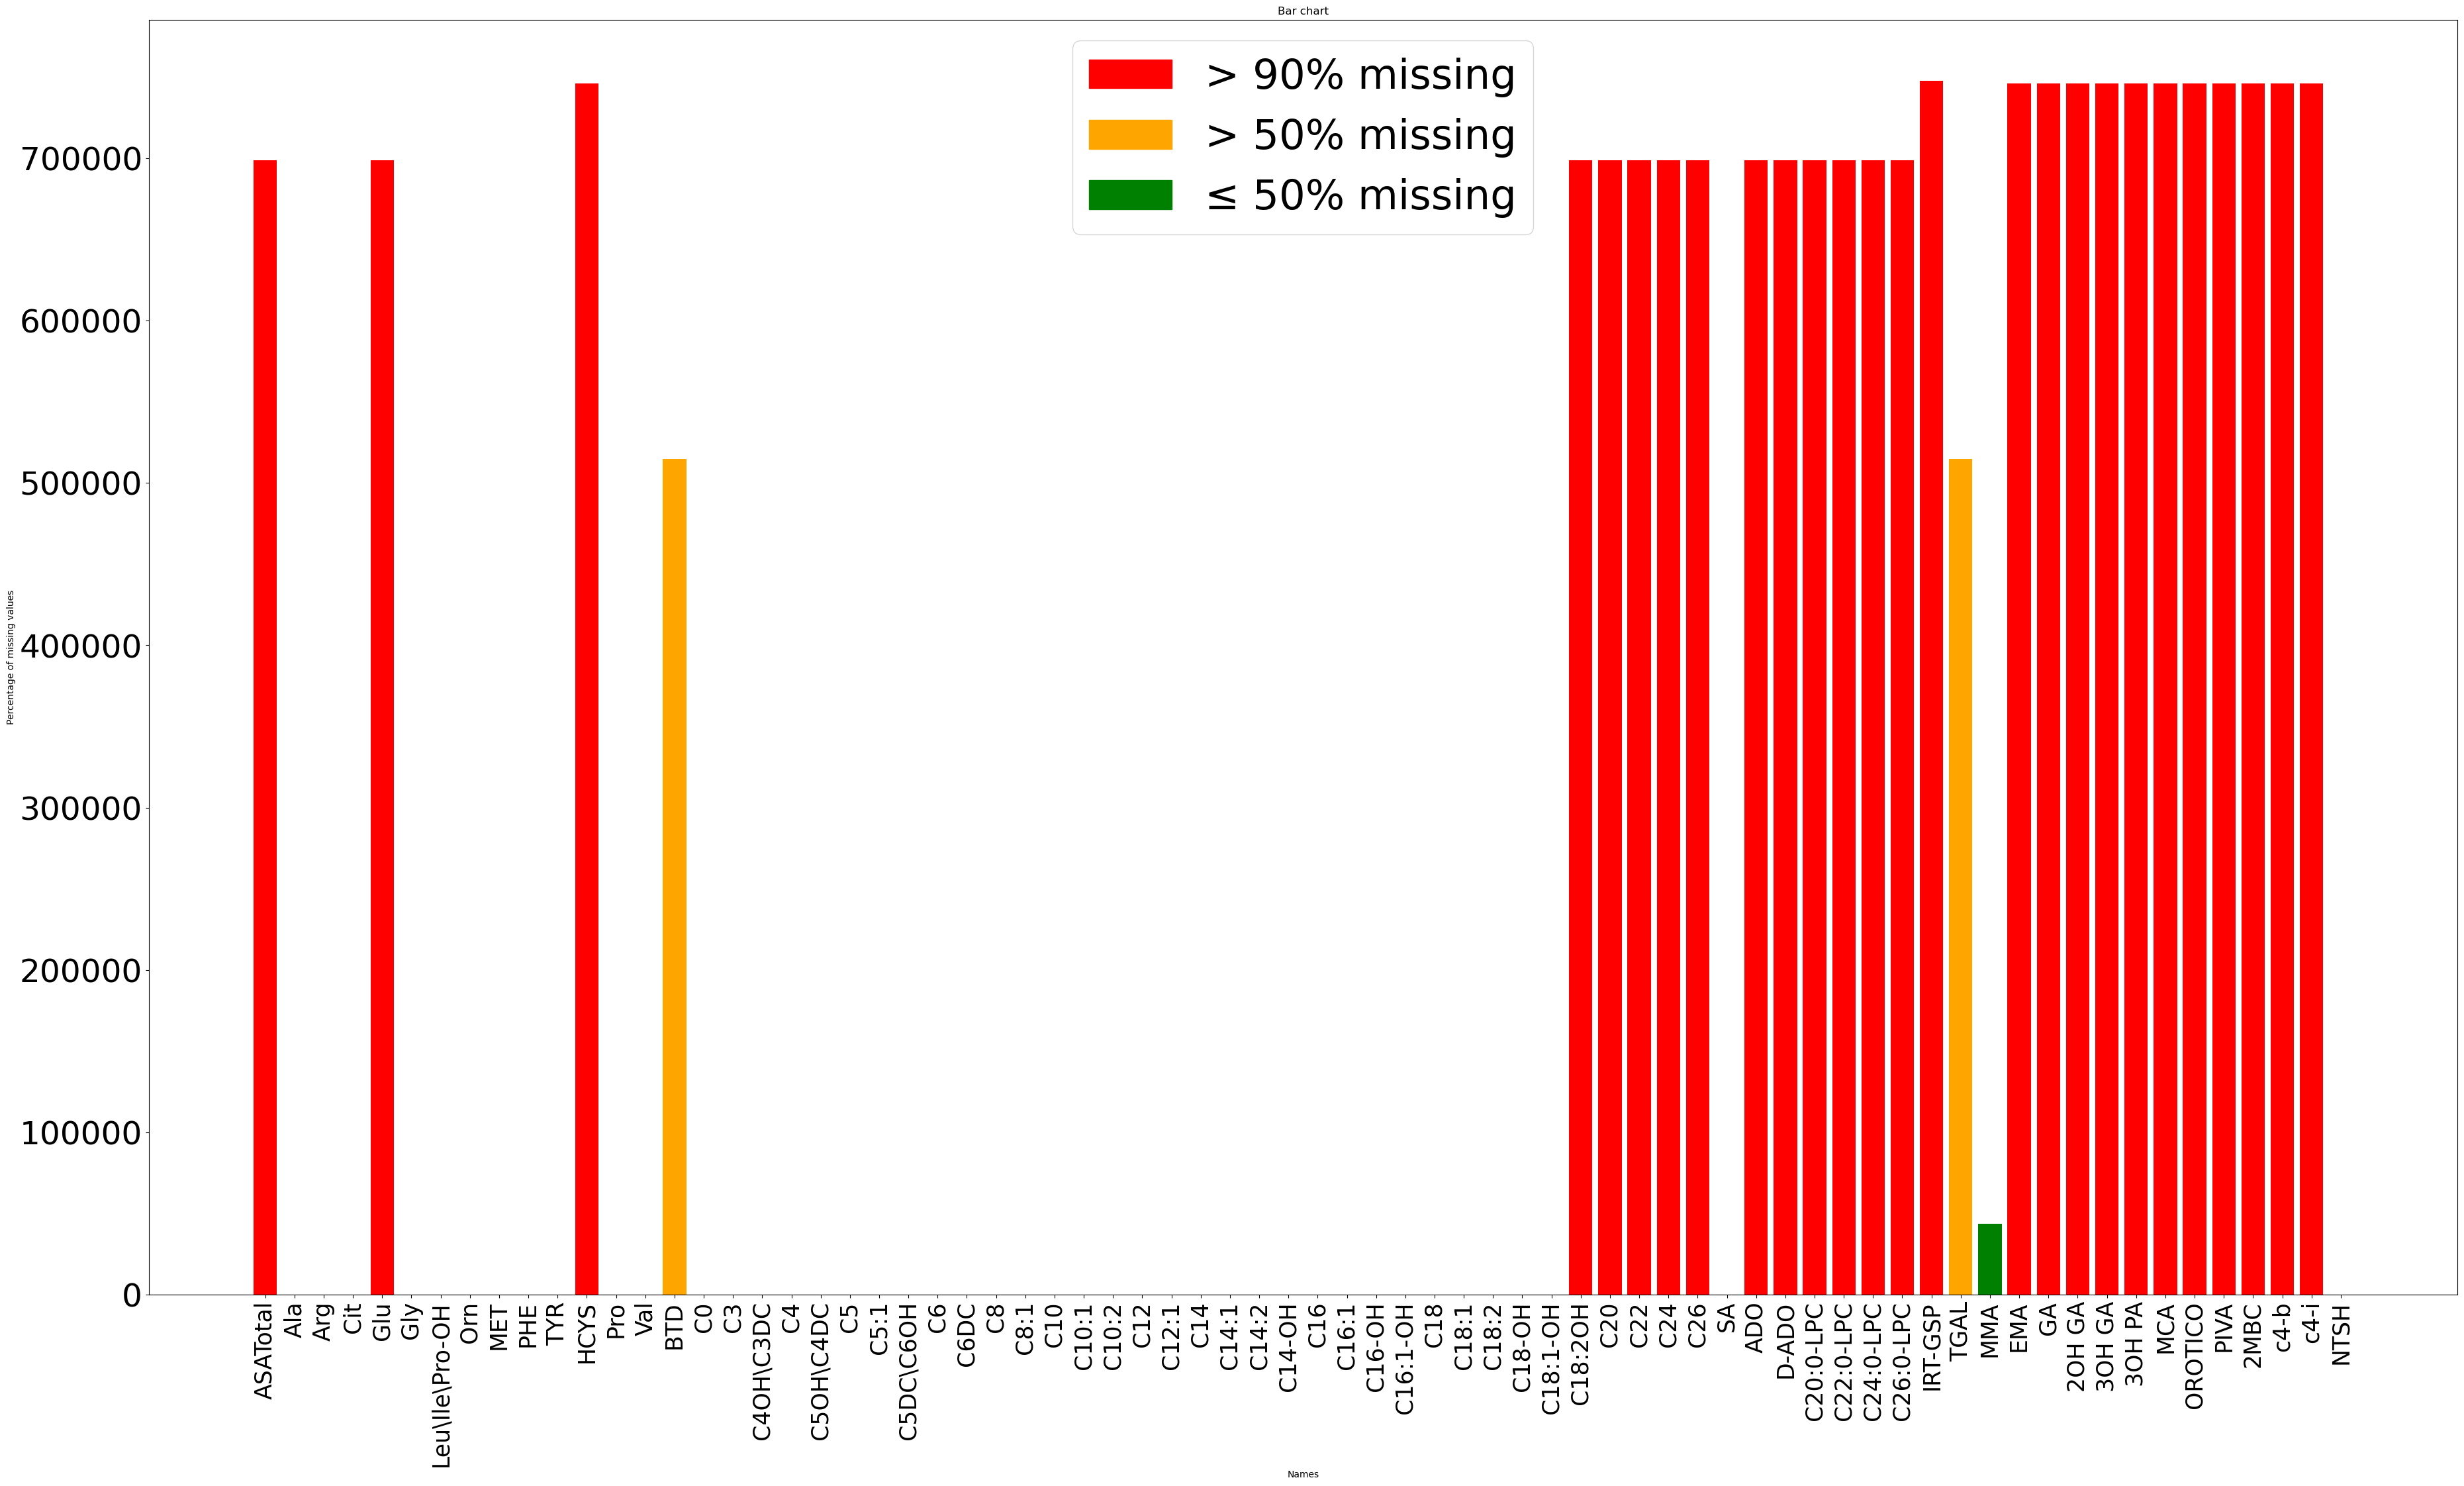

In [554]:
import matplotlib.patches as mpatches

i = 0
x = num_col
colors = []
y = []

for val in num_col:
    percentage = (babies_def2[val].null_count()/babies_def2.shape[0])*100
    if percentage > 90:
        colors.append('red')
        i = i+1
    elif percentage > 50:
        colors.append('orange')
    else:
        colors.append('green')
    y.append(babies_def2[val].null_count())

plt.figure(figsize=(45, 25))
plt.bar(x, y, color = colors, width= 0.8)
plt.xlabel('Names')
plt.ylabel('Percentage of missing values')
plt.title('Bar chart')
plt.xticks(rotation=90, fontsize = 25)
plt.yticks(fontsize= 35)

red_patch = mpatches.Patch(color='red', label='> 90% missing')
orange_patch = mpatches.Patch(color='orange', label='> 50% missing')
green_patch = mpatches.Patch(color='green', label='≤ 50% missing')

plt.legend(handles=[red_patch, orange_patch, green_patch], fontsize=45, loc = 'upper center', frameon=True)

plt.savefig('missing_new2.png')
plt.show()

In [555]:
set(colors)

{'green', 'orange', 'red'}

In [679]:
perc = []

for val in babies_def2.columns:
    percentage = (babies_def2[val].null_count()/babies_def2.shape[0])*100
    perc.append([round(percentage,2), val])
perc

[[93.33, 'ASATotal'],
 [0.02, 'Ala'],
 [0.02, 'Arg'],
 [0.02, 'Cit'],
 [93.33, 'Glu'],
 [0.02, 'Gly'],
 [0.02, 'Leu\\Ile\\Pro-OH'],
 [0.02, 'Orn'],
 [0.02, 'MET'],
 [0.02, 'PHE'],
 [0.02, 'TYR'],
 [99.63, 'HCYS'],
 [0.02, 'Pro'],
 [0.02, 'Val'],
 [68.74, 'BTD'],
 [0.02, 'C0'],
 [0.02, 'C3'],
 [0.02, 'C4OH\\C3DC'],
 [0.02, 'C4'],
 [0.02, 'C5OH\\C4DC'],
 [0.02, 'C5'],
 [0.02, 'C5:1'],
 [0.02, 'C5DC\\C6OH'],
 [0.02, 'C6'],
 [0.02, 'C6DC'],
 [0.02, 'C8'],
 [0.02, 'C8:1'],
 [0.02, 'C10'],
 [0.02, 'C10:1'],
 [0.02, 'C10:2'],
 [0.02, 'C12'],
 [0.02, 'C12:1'],
 [0.02, 'C14'],
 [0.02, 'C14:1'],
 [0.02, 'C14:2'],
 [0.02, 'C14-OH'],
 [0.02, 'C16'],
 [0.02, 'C16:1'],
 [0.02, 'C16-OH'],
 [0.02, 'C16:1-OH'],
 [0.02, 'C18'],
 [0.02, 'C18:1'],
 [0.02, 'C18:2'],
 [0.02, 'C18-OH'],
 [0.02, 'C18:1-OH'],
 [93.33, 'C18:2OH'],
 [93.33, 'C20'],
 [93.33, 'C22'],
 [93.33, 'C24'],
 [93.33, 'C26'],
 [0.02, 'SA'],
 [93.33, 'ADO'],
 [93.33, 'D-ADO'],
 [93.33, 'C20:0-LPC'],
 [0.0, 'NTSH'],
 [93.33, 'C22:0-LPC'],
 [

#### Statistics

In [558]:
statistics_tot = babies_def2[num_col].describe()
iq99 = babies_def2.select(pl.col(num_col).quantile(0.99))
iq01 = babies_def2.select(pl.col(num_col).quantile(0.01))
kurt = babies_def2.select(pl.col(num_col).kurtosis())
ske = babies_def2.select(pl.col(num_col).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_tot = pl.concat([statistics_tot, more_stat])
statistics_tot = statistics_tot.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col) for col in more_stat.columns])

In [559]:
header = statistics_tot["statistic"].to_list()

index = statistics_tot.transpose(include_header=True)

index.columns = ['Name'] + header
index[1:]

shape: (72, 14)
┌─────────────┬──────────┬────────────┬──────────┬───┬───────────┬─────────┬────────────┬──────────┐
│ Name        ┆ count    ┆ null_count ┆ mean     ┆ … ┆ 99%       ┆ 1%      ┆ Kurtosis   ┆ Skewness │
│ ---         ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---       ┆ ---     ┆ ---        ┆ ---      │
│ str         ┆ str      ┆ str        ┆ str      ┆   ┆ str       ┆ str     ┆ str        ┆ str      │
╞═════════════╪══════════╪════════════╪══════════╪═══╪═══════════╪═════════╪════════════╪══════════╡
│ ASATotal    ┆ 49923.0  ┆ 698795.0   ┆ 0.287    ┆ … ┆ 1.032     ┆ 0.095   ┆ 27.345     ┆ 3.925    │
│ Ala         ┆ 748596.0 ┆ 122.0      ┆ 344.391  ┆ … ┆ 532.802   ┆ 123.89  ┆ 492977.72  ┆ 638.098  │
│ Arg         ┆ 748596.0 ┆ 122.0      ┆ 10.884   ┆ … ┆ 36.85     ┆ 1.0     ┆ 745245.777 ┆ 862.324  │
│ Cit         ┆ 748596.0 ┆ 122.0      ┆ 14.302   ┆ … ┆ 30.61     ┆ 4.35    ┆ 22213.04   ┆ 120.765  │
│ Glu         ┆ 49923.0  ┆ 698795.0   ┆ 249.371  ┆ … ┆ 443.754   ┆ 129.825 ┆ 49578.527  ┆ 222.288  │
│ Gly         ┆ 748596.0 ┆ 122.0      ┆ 554.746  ┆ … ┆ 901.62    ┆ 165.8   ┆ 5910.259   ┆ 73.346   │
│ Leu\Ile\Pro ┆ 748598.0 ┆ 120.0      ┆ 187.116  ┆ … ┆ 266.04    ┆ 78.48   ┆ 6989.489   ┆ 79.064   │
│ -OH         ┆          ┆            ┆          ┆   ┆           ┆         ┆            ┆          │
│ Orn         ┆ 748596.0 ┆ 122.0      ┆ 127.54   ┆ … ┆ 271.1     ┆ 42.52   ┆ 21635.504  ┆ 132.983  │
│ MET         ┆ 748598.0 ┆ 120.0      ┆ 20.285   ┆ … ┆ 38.04     ┆ 8.719   ┆ 627666.89  ┆ 760.443  │
│ PHE         ┆ 748601.0 ┆ 117.0      ┆ 61.574   ┆ … ┆ 96.43     ┆ 33.58   ┆ 88852.117  ┆ 265.909  │
│ TYR         ┆ 748600.0 ┆ 118.0      ┆ 130.735  ┆ … ┆ 234.26    ┆ 38.58   ┆ 719657.159 ┆ 840.416  │
│ HCYS        ┆ 2804.0   ┆ 745914.0   ┆ 3.191    ┆ … ┆ 9.76      ┆ 0.795   ┆ 317.477    ┆ 13.108   │
│ Pro         ┆ 748596.0 ┆ 122.0      ┆ 236.546  ┆ … ┆ 321.72    ┆ 98.198  ┆ 460306.854 ┆ 608.584  │
│ Val         ┆ 748596.0 ┆ 122.0      ┆ 490.204  ┆ … ┆ 257.22    ┆ 65.88   ┆ 748423.782 ┆ 865.068  │
│ BTD         ┆ 234029.0 ┆ 514689.0   ┆ 243.72   ┆ … ┆ 354.346   ┆ 109.605 ┆ -0.411     ┆ -0.276   │
│ C0          ┆ 748596.0 ┆ 122.0      ┆ 19.546   ┆ … ┆ 49.48     ┆ 6.87    ┆ 9066.991   ┆ 83.124   │
│ C3          ┆ 748596.0 ┆ 122.0      ┆ 2.123    ┆ … ┆ 5.36      ┆ 0.73    ┆ 176934.705 ┆ 351.231  │
│ C4OH\C3DC   ┆ 748595.0 ┆ 123.0      ┆ 0.196    ┆ … ┆ 0.47      ┆ 0.05    ┆ 157.589    ┆ 2.68     │
│ C4          ┆ 748596.0 ┆ 122.0      ┆ 0.25     ┆ … ┆ 0.72      ┆ 0.07    ┆ 4119.65    ┆ 24.655   │
│ C5OH\C4DC   ┆ 748595.0 ┆ 123.0      ┆ 0.206    ┆ … ┆ 0.42      ┆ 0.08    ┆ 12628.498  ┆ 59.508   │
│ C5          ┆ 748596.0 ┆ 122.0      ┆ 0.116    ┆ … ┆ 0.36      ┆ 0.04    ┆ 4083.711   ┆ 32.7     │
│ C5:1        ┆ 748596.0 ┆ 122.0      ┆ 0.009    ┆ … ┆ 0.03      ┆ 0.0     ┆ 2186.549   ┆ 18.425   │
│ C5DC\C6OH   ┆ 748595.0 ┆ 123.0      ┆ 0.13     ┆ … ┆ 0.27      ┆ 0.05    ┆ 10838.091  ┆ 44.52    │
│ C6          ┆ 748596.0 ┆ 122.0      ┆ 0.047    ┆ … ┆ 0.11      ┆ 0.01    ┆ 4953.782   ┆ 31.583   │
│ C6DC        ┆ 748596.0 ┆ 122.0      ┆ 0.125    ┆ … ┆ 0.28      ┆ 0.03    ┆ 7805.809   ┆ 29.884   │
│ C8          ┆ 748596.0 ┆ 122.0      ┆ 0.064    ┆ … ┆ 0.18      ┆ 0.02    ┆ 84791.377  ┆ 263.947  │
│ C8:1        ┆ 748596.0 ┆ 122.0      ┆ 0.035    ┆ … ┆ 0.12      ┆ 0.01    ┆ 42.367     ┆ 3.449    │
│ C10         ┆ 748596.0 ┆ 122.0      ┆ 0.095    ┆ … ┆ 0.27      ┆ 0.03    ┆ 2715.724   ┆ 15.977   │
│ C10:1       ┆ 748596.0 ┆ 122.0      ┆ 0.049    ┆ … ┆ 0.11      ┆ 0.02    ┆ 91.709     ┆ 3.906    │
│ C10:2       ┆ 748596.0 ┆ 122.0      ┆ 0.003    ┆ … ┆ 0.02      ┆ 0.0     ┆ 1543.369   ┆ 14.979   │
│ C12         ┆ 748596.0 ┆ 122.0      ┆ 0.123    ┆ … ┆ 0.36      ┆ 0.03    ┆ 896.146    ┆ 7.727    │
│ C12:1       ┆ 748596.0 ┆ 122.0      ┆ 0.091    ┆ … ┆ 0.29      ┆ 0.02    ┆ 13.868     ┆ 2.305    │
│ C14         ┆ 748596.0 ┆ 122.0      ┆ 0.239    ┆ … ┆ 0.501     ┆ 0.1     ┆ 386.629    ┆ 5.314    │
│ C14:1       ┆ 748596.0 ┆ 122.0      ┆ 0.131

In [560]:
sel = index['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [561]:
statistics_tot_pandas = sel.to_pandas()

# Esporta come tabella LaTeX
statistiche_totali = statistics_tot_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("statistiche totali.tex", "w") as f:
    f.write(statistiche_totali)

In [562]:
num_col

['ASATotal',
 'Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'NTSH']

group_c = ['C0', 'C3', 'C4OH\\C3DC', 'C4', 'C5OH\\C4DC', 'C5', 'C5:1', 'C5DC\\C6OH', 'C6', 'C6DC', 'C8', 'C8:1', 'C10', 'C10:1', 'C10:2', 'C12', 'C12:1', 'C14', 'C14:1', 'C14:2', 'C14-OH', 'C16', 'C16:1', 'C16-OH', 'C16:1-OH', 'C18', 'C18:1', 'C18:2', 'C18-OH', 'C18:1-OH']

In [564]:
babies_def2 = babies_def2.drop('check')

In [565]:
babies_def2.write_csv('Dataset_Paper_2.csv')

### Wheight

#### Bambini che pesano meno di 1,5 kg

In [568]:
colonne_numeriche = num_col

In [569]:
extra_piccoli = babies_def2.filter(pl.col('Weight') < 1500)

In [570]:
extra_piccoli.shape

(5966, 100)

In [571]:
statistics_ppp2 = extra_piccoli[colonne_numeriche].describe()
iq99 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = extra_piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = extra_piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_ppp2 = pl.concat([statistics_ppp2, more_stat])
statistics_ppp2 = statistics_ppp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [572]:
statistics_ppp2

shape: (13, 73)
┌────────────┬──────────┬────────────┬────────────┬───┬────────┬────────┬────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg        ┆ … ┆ 2MBC   ┆ c4-b   ┆ c4-i   ┆ NTSH     │
│ ---        ┆ ---      ┆ ---        ┆ ---        ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---      │
│ str        ┆ f64      ┆ f64        ┆ f64        ┆   ┆ f64    ┆ f64    ┆ f64    ┆ f64      │
╞════════════╪══════════╪════════════╪════════════╪═══╪════════╪════════╪════════╪══════════╡
│ count      ┆ 363.0    ┆ 5966.0     ┆ 5966.0     ┆ … ┆ 37.0   ┆ 37.0   ┆ 37.0   ┆ 5966.0   │
│ null_count ┆ 5603.0   ┆ 0.0        ┆ 0.0        ┆ … ┆ 5929.0 ┆ 5929.0 ┆ 5929.0 ┆ 0.0      │
│ mean       ┆ 0.372    ┆ 730.557    ┆ 117.452    ┆ … ┆ 0.293  ┆ 0.316  ┆ 1.196  ┆ 2.055    │
│ std        ┆ 0.213    ┆ 12666.073  ┆ 6388.356   ┆ … ┆ 0.158  ┆ 0.471  ┆ 5.732  ┆ 4.806    │
│ min        ┆ 0.092    ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.062  ┆ 0.031  ┆ 0.052  ┆ 0.0      │
│ 25%        ┆ 0.247    ┆ 189.26     ┆ 13.14      ┆ … ┆ 0.172  ┆ 0.073  ┆ 0.161  ┆ 0.916    │
│ 50%        ┆ 0.321    ┆ 248.6      ┆ 24.37      ┆ … ┆ 0.264  ┆ 0.135  ┆ 0.244  ┆ 1.571    │
│ 75%        ┆ 0.448    ┆ 337.76     ┆ 40.7       ┆ … ┆ 0.365  ┆ 0.301  ┆ 0.38   ┆ 2.54     │
│ max        ┆ 2.514    ┆ 519538.705 ┆ 493407.175 ┆ … ┆ 0.751  ┆ 2.28   ┆ 35.115 ┆ 348.47   │
│ 99%        ┆ 1.12     ┆ 818.36     ┆ 139.26     ┆ … ┆ 0.751  ┆ 2.28   ┆ 35.115 ┆ 8.15     │
│ 1%         ┆ 0.123    ┆ 91.78      ┆ 2.45       ┆ … ┆ 0.062  ┆ 0.031  ┆ 0.052  ┆ 0.186    │
│ Kurtosis   ┆ 29.842   ┆ 975.504    ┆ 5957.934   ┆ … ┆ 0.488  ┆ 7.146  ┆ 31.998 ┆ 4522.126 │
│ Skewness   ┆ 3.897    ┆ 30.332     ┆ 77.191     ┆ … ┆ 0.853  ┆ 2.684  ┆ 5.829  ┆ 62.961   │
└────────────┴──────────┴────────────┴────────────┴───┴────────┴────────┴────────┴──────────┘

In [573]:
header = statistics_ppp2["statistic"].to_list()

prova = statistics_ppp2.transpose(include_header=True)

prova.columns = ['Name'] + header
prova[1:]

prova_bis = prova['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [574]:
statistics_ppp2_pandas = prova_bis.to_pandas()

# Esporta come tabella LaTeX
statistiche_1500 = statistics_ppp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("extra_piccoli.tex", "w") as f:
    f.write(statistiche_1500)

In [575]:
len(colonne_numeriche)

72

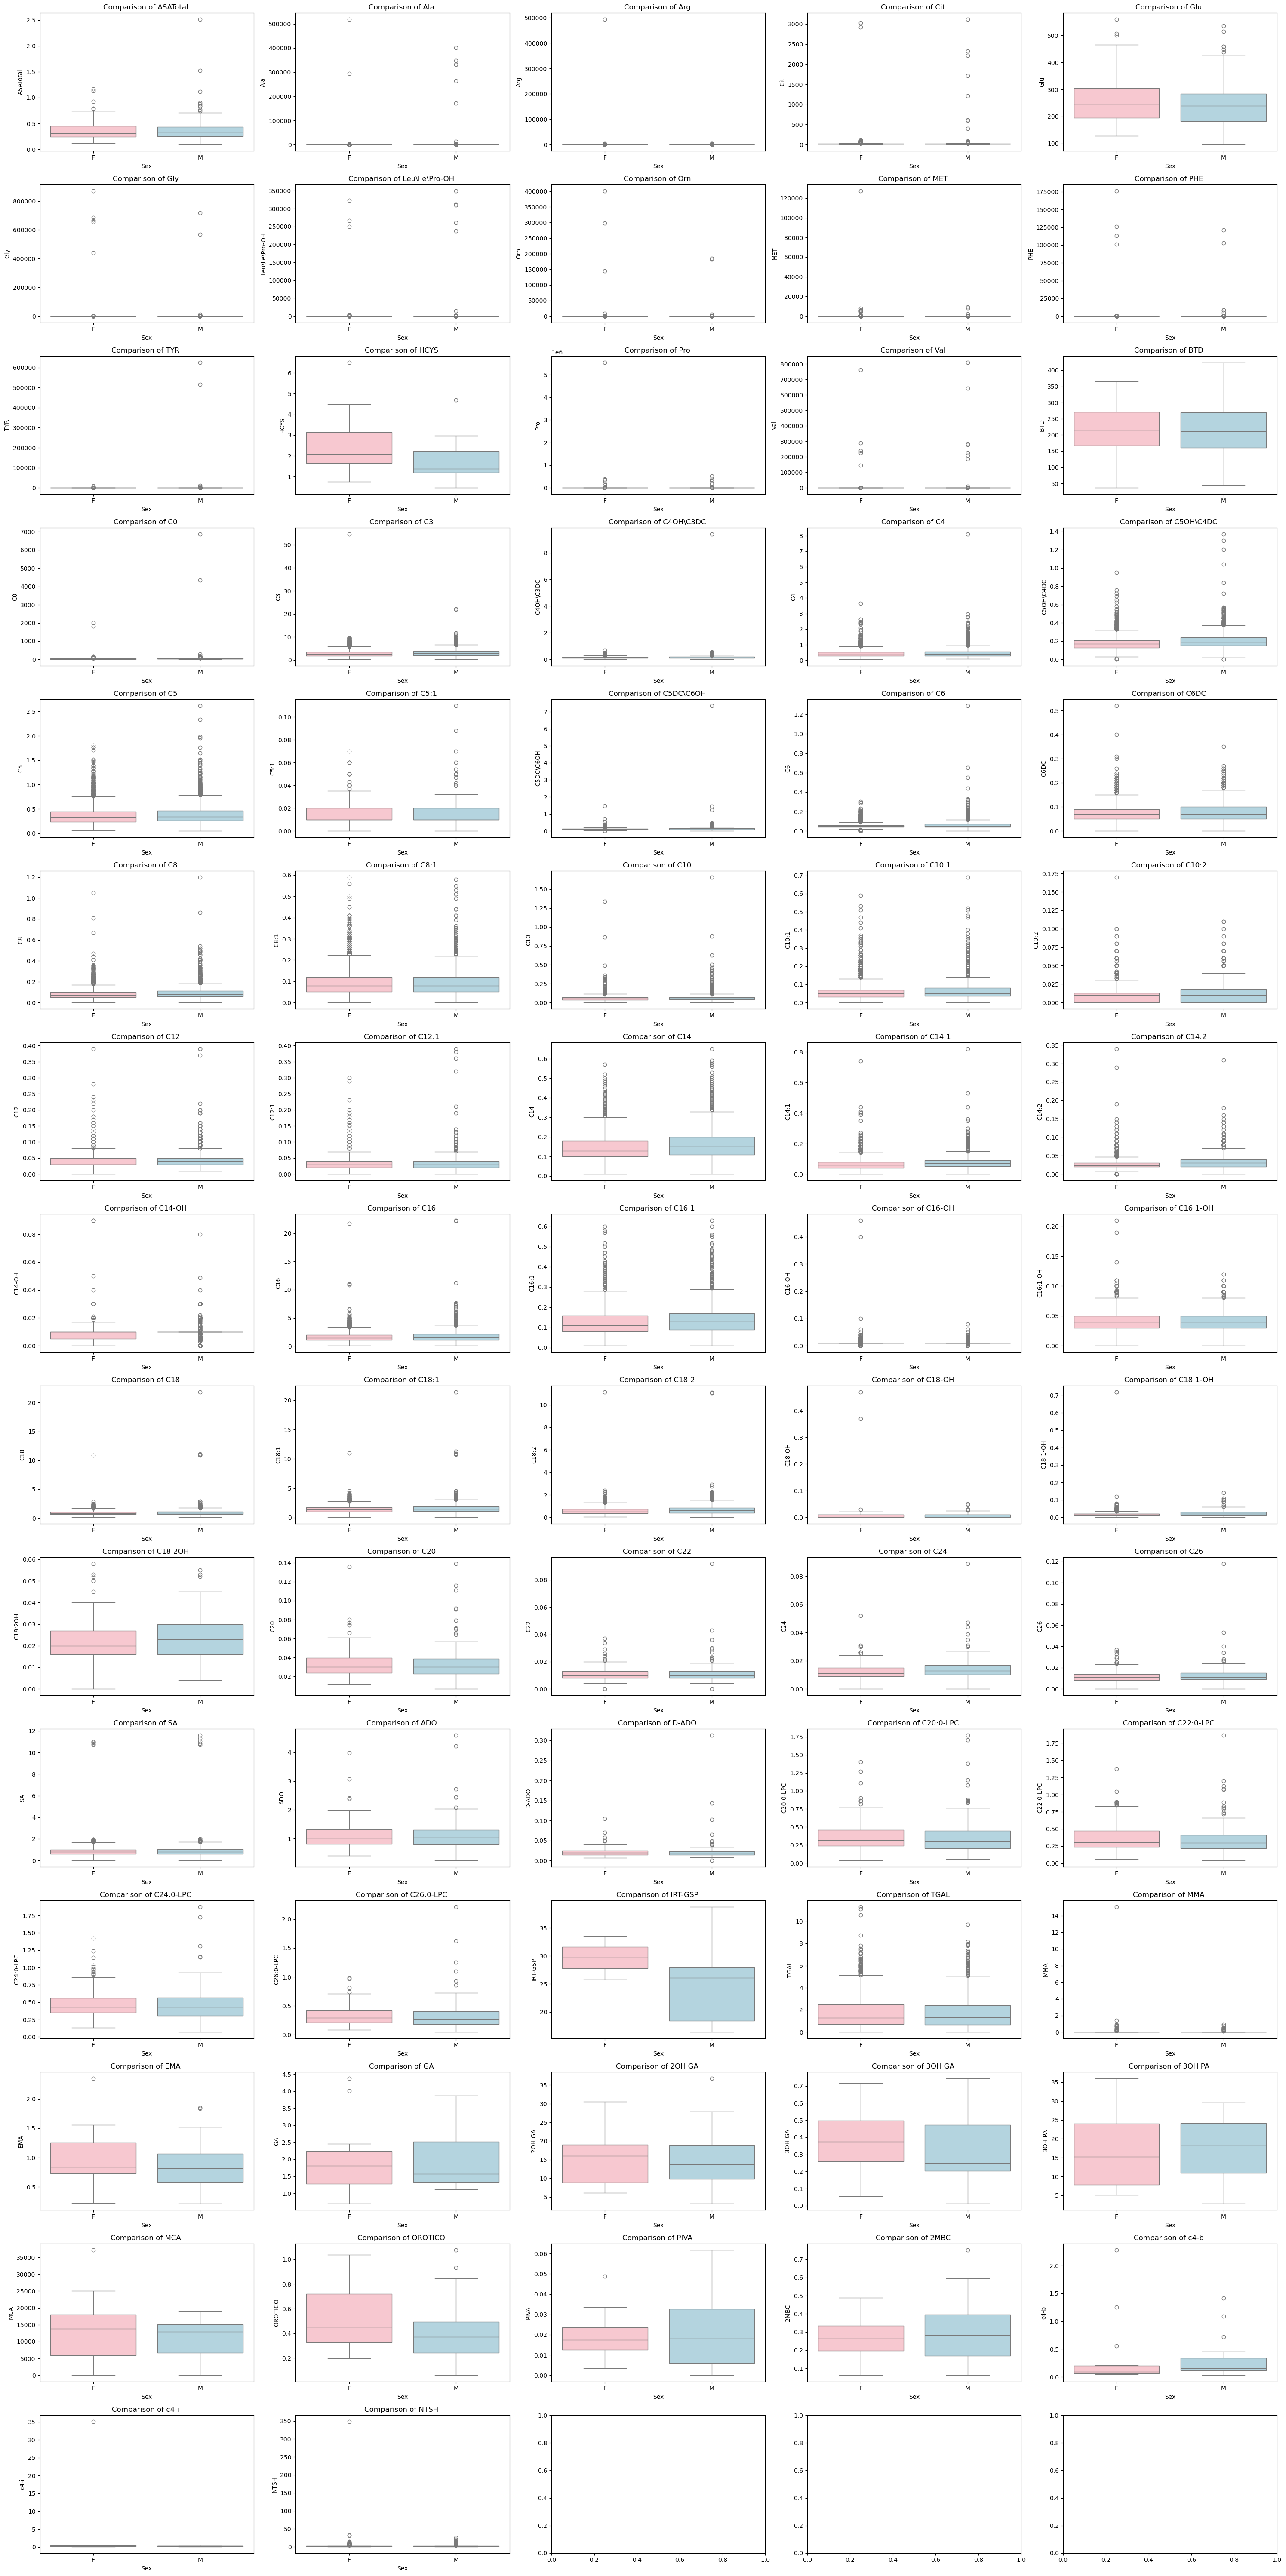

In [576]:
import seaborn as sns
import matplotlib.pyplot as plt

extra_piccoli_pandas = extra_piccoli.to_pandas()

# Creazione dei subplot
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

i, j = 0, 0  # Assicurati di inizializzare `i` e `j` correttamente per indicizzare gli assi
for col in colonne_numeriche: 
    sns.boxplot(
        x='Sex', 
        y=col, 
        ax=axes[i, j], 
        data=extra_piccoli_pandas, 
        hue='Sex', 
        palette={'M': 'lightblue', 'F': 'pink'}
    )  
    axes[i, j].set_title(f'Comparison of {col} ')
    j += 1
    if j == 5:  # Passa alla riga successiva
        i += 1
        j = 0

plt.tight_layout()
plt.savefig('Extrapiccoli.png')
plt.show()


#### Bambini che pesano tra 2 e 1,5 kg

In [578]:
piccoli_pic = babies_def2.filter((pl.col('Weight') >= 1500) & (pl.col('Weight') < 2000))
piccoli_pic.shape

(9172, 100)

In [579]:
statistics_pp2 = piccoli_pic[colonne_numeriche].describe()
iq99 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli_pic.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli_pic.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_pp2 = pl.concat([statistics_pp2, more_stat])
statistics_pp2 = statistics_pp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [580]:
header = statistics_pp2["statistic"].to_list()

prova2 = statistics_pp2.transpose(include_header=True)

prova2.columns = ['Name'] + header
prova2[1:]
unoemezzodue = prova2['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [581]:
statistics_pp2_pandas = unoemezzodue.to_pandas()

# Esporta come tabella LaTeX
statistiche_2000 = statistics_pp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("unoemezzodue_table.tex", "w") as f:
    f.write(statistiche_2000)

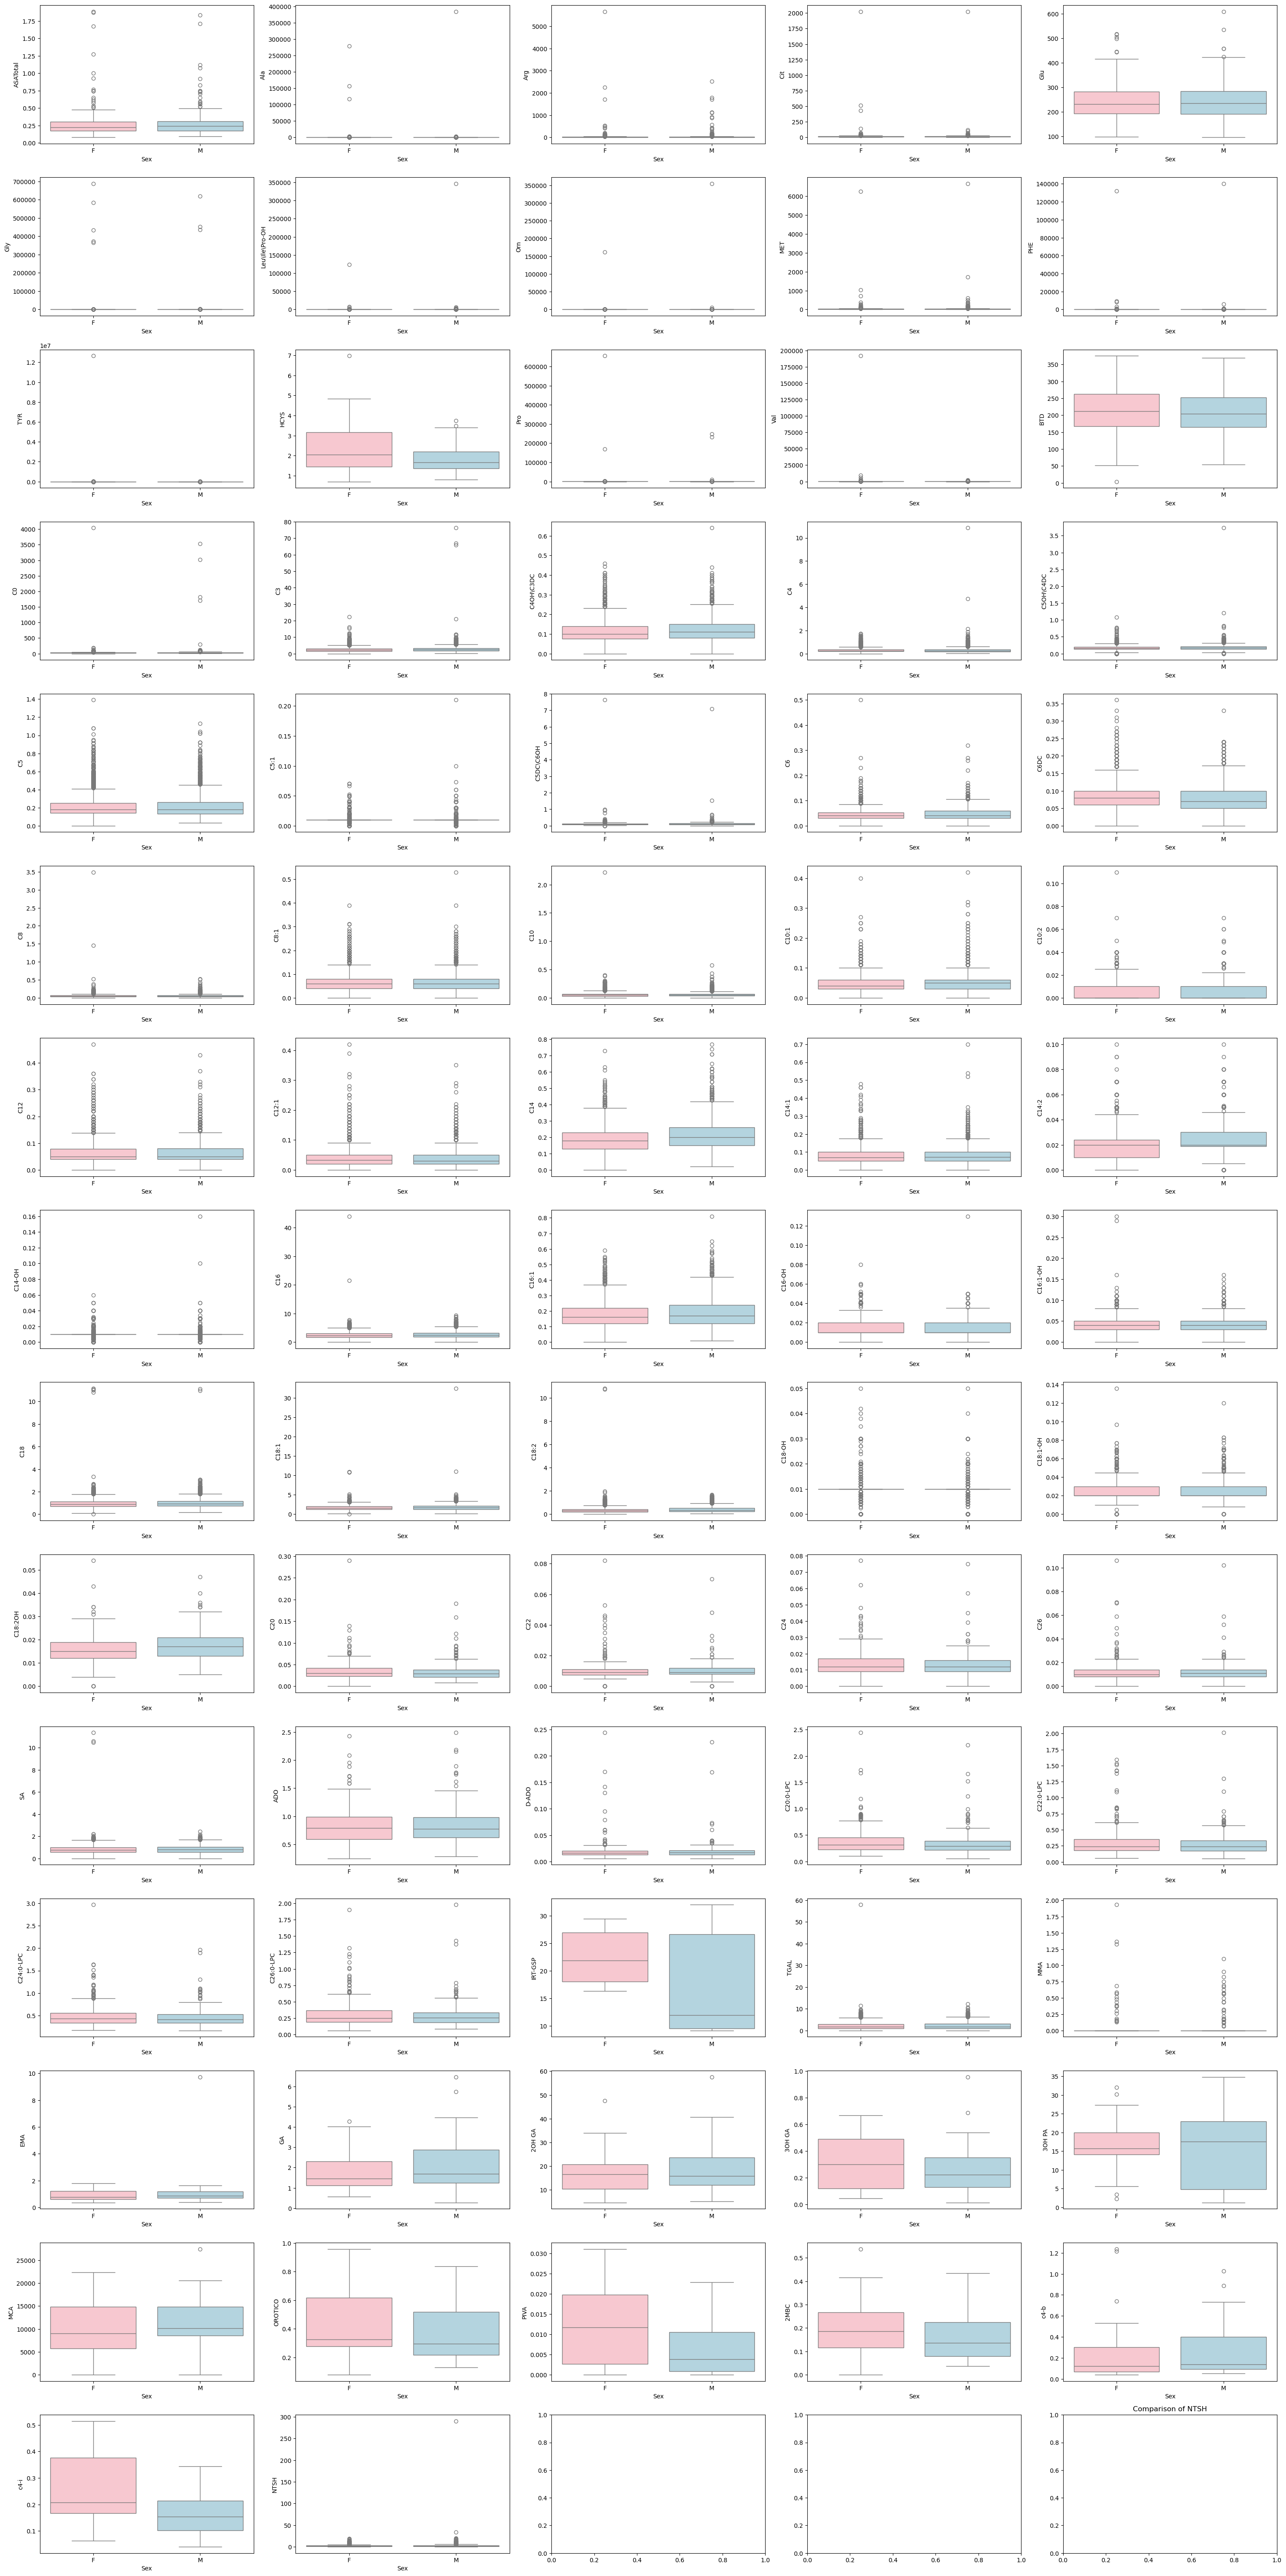

In [582]:
j = 0
i = 0
piccoli_picp = piccoli_pic.to_pandas()

fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in colonne_numeriche: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli_picp, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Comparison of {col}')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_piccoli.png')
plt.tight_layout()

####  Bambini che pesano tra 2 kg di 2,5 kg

In [584]:
piccoli = babies_def2.filter((pl.col('Weight') < 2500) & (pl.col('Weight') >= 2000))
piccoli.shape


(35527, 100)

In [585]:
statistics_p2 = piccoli[colonne_numeriche].describe()
iq99 = piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_p2 = pl.concat([statistics_p2, more_stat])
statistics_p2 = statistics_p2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_p2

shape: (13, 73)
┌────────────┬──────────┬───────────┬──────────┬───┬─────────┬─────────┬─────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg      ┆ … ┆ 2MBC    ┆ c4-b    ┆ c4-i    ┆ NTSH     │
│ ---        ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---     ┆ ---     ┆ ---     ┆ ---      │
│ str        ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64     ┆ f64     ┆ f64     ┆ f64      │
╞════════════╪══════════╪═══════════╪══════════╪═══╪═════════╪═════════╪═════════╪══════════╡
│ count      ┆ 2296.0   ┆ 35521.0   ┆ 35521.0  ┆ … ┆ 158.0   ┆ 158.0   ┆ 158.0   ┆ 35527.0  │
│ null_count ┆ 33231.0  ┆ 6.0       ┆ 6.0      ┆ … ┆ 35369.0 ┆ 35369.0 ┆ 35369.0 ┆ 0.0      │
│ mean       ┆ 0.268    ┆ 325.408   ┆ 10.914   ┆ … ┆ 0.115   ┆ 0.162   ┆ 0.151   ┆ 2.706    │
│ std        ┆ 0.179    ┆ 4502.878  ┆ 53.557   ┆ … ┆ 0.068   ┆ 0.201   ┆ 0.093   ┆ 4.44     │
│ min        ┆ 0.05     ┆ 0.0       ┆ 0.0      ┆ … ┆ 0.0     ┆ 0.021   ┆ 0.007   ┆ 0.0      │
│ 25%        ┆ 0.175    ┆ 194.69    ┆ 4.49     ┆ … ┆ 0.066   ┆ 0.063   ┆ 0.095   ┆ 1.412    │
│ 50%        ┆ 0.232    ┆ 242.68    ┆ 7.8      ┆ … ┆ 0.097   ┆ 0.096   ┆ 0.134   ┆ 2.207    │
│ 75%        ┆ 0.305    ┆ 302.13    ┆ 12.86    ┆ … ┆ 0.145   ┆ 0.155   ┆ 0.179   ┆ 3.358    │
│ max        ┆ 2.692    ┆ 445301.98 ┆ 5661.43  ┆ … ┆ 0.356   ┆ 1.208   ┆ 0.76    ┆ 415.07   │
│ 99%        ┆ 1.115    ┆ 541.324   ┆ 43.15    ┆ … ┆ 0.333   ┆ 0.972   ┆ 0.407   ┆ 9.17     │
│ 1%         ┆ 0.09     ┆ 107.75    ┆ 0.99     ┆ … ┆ 0.015   ┆ 0.027   ┆ 0.032   ┆ 0.403    │
│ Kurtosis   ┆ 36.729   ┆ 5443.927  ┆ 5927.453 ┆ … ┆ 1.696   ┆ 9.496   ┆ 12.947  ┆ 4997.798 │
│ Skewness   ┆ 4.749    ┆ 71.082    ┆ 71.477   ┆ … ┆ 1.278   ┆ 3.026   ┆ 2.753   ┆ 61.336   │
└────────────┴──────────┴───────────┴──────────┴───┴─────────┴─────────┴─────────┴──────────┘

In [586]:
header = statistics_p2["statistic"].to_list()

prova3 = statistics_p2.transpose(include_header=True)

prova3.columns = ['Name'] + header
prova3[1:]

duemezzo = prova3['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [587]:
statistics_p2_pandas = duemezzo.to_pandas()
statistiche_2500 = statistics_p2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("duemezzo_table.tex", "w") as f:
    f.write(statistiche_2500)

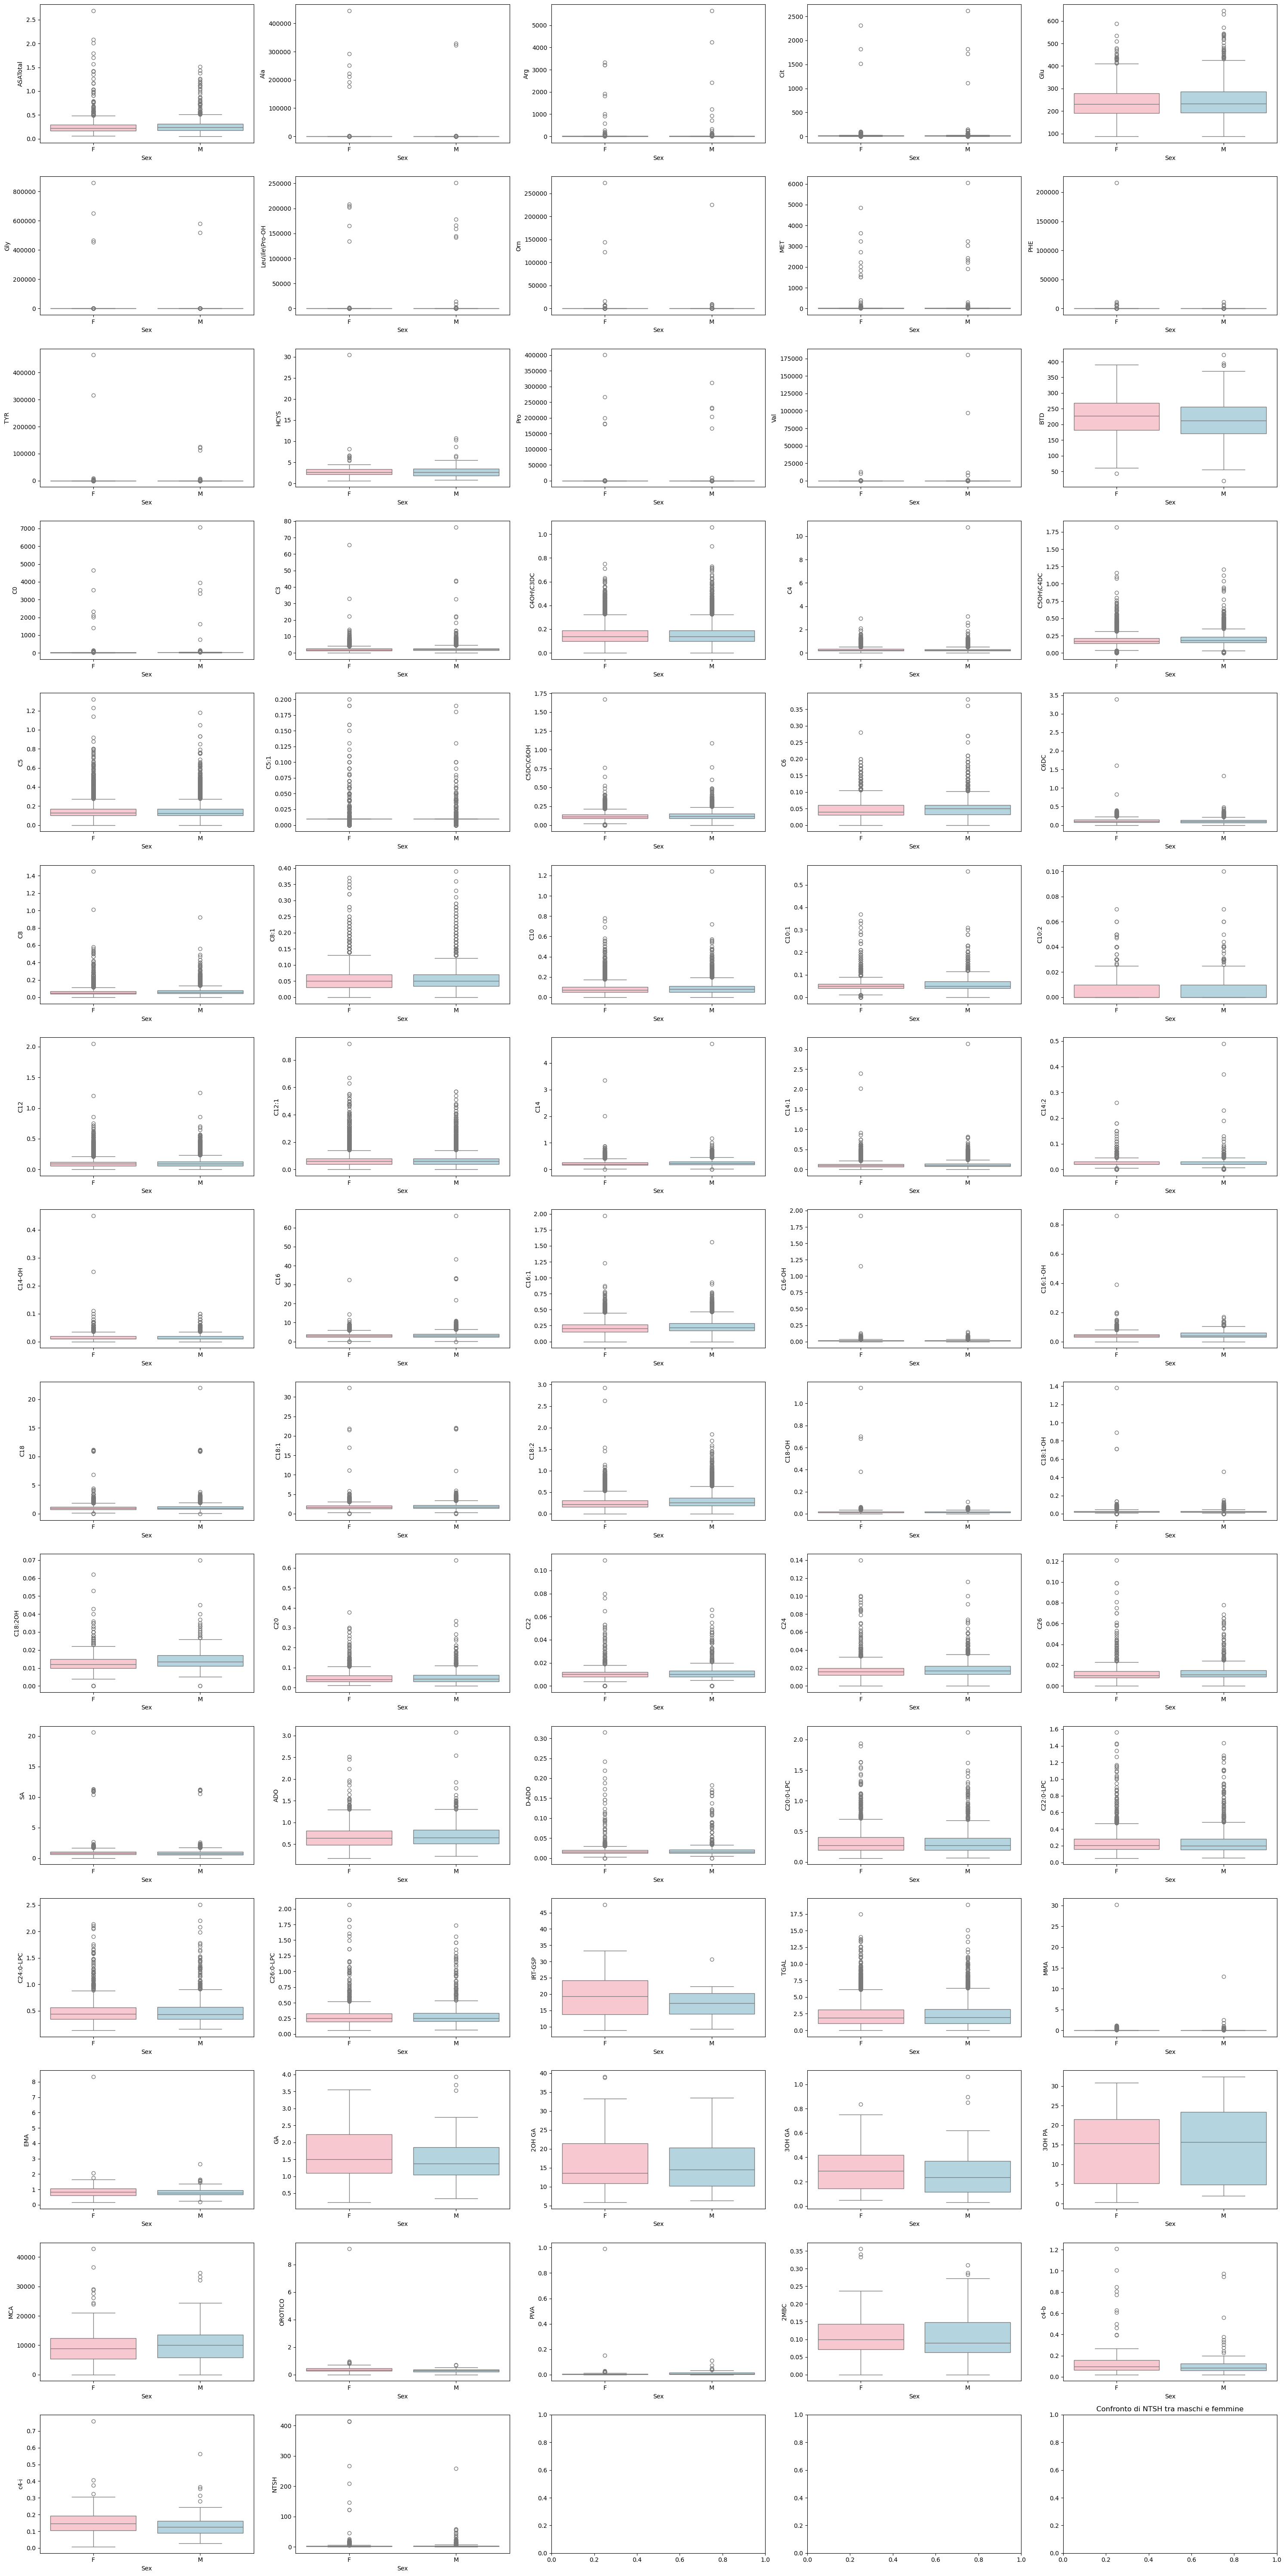

In [588]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

piccolip = piccoli.to_pandas()

for col in colonne_numeriche: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccolip, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_medi.png')
plt.tight_layout()

#### Babies over 2,5kg 

In [590]:
ciccioni = babies_def2.filter(pl.col('Weight') >= 2500)
ciccioni.shape

(698052, 100)

In [591]:
statistics_c2 = ciccioni[colonne_numeriche].describe()
iq99 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = ciccioni.select(pl.col(colonne_numeriche).kurtosis())
ske = ciccioni.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_c2 = pl.concat([statistics_c2, more_stat])
statistics_c2 = statistics_c2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_c2

shape: (13, 73)
┌────────────┬──────────┬───────────┬───────────┬───┬──────────┬──────────┬──────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg       ┆ … ┆ 2MBC     ┆ c4-b     ┆ c4-i     ┆ NTSH     │
│ ---        ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ f64       ┆ f64       ┆   ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪══════════╪═══════════╪═══════════╪═══╪══════════╪══════════╪══════════╪══════════╡
│ count      ┆ 46727.0  ┆ 697940.0  ┆ 697940.0  ┆ … ┆ 2563.0   ┆ 2563.0   ┆ 2563.0   ┆ 698045.0 │
│ null_count ┆ 651325.0 ┆ 112.0     ┆ 112.0     ┆ … ┆ 695489.0 ┆ 695489.0 ┆ 695489.0 ┆ 7.0      │
│ mean       ┆ 0.287    ┆ 341.934   ┆ 9.885     ┆ … ┆ 0.08     ┆ 0.184    ┆ 0.216    ┆ 2.488    │
│ std        ┆ 0.175    ┆ 11038.241 ┆ 21.311    ┆ … ┆ 0.043    ┆ 0.239    ┆ 3.328    ┆ 3.831    │
│ min        ┆ 0.036    ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ 25%        ┆ 0.188    ┆ 205.73    ┆ 4.77      ┆ … ┆ 0.053    ┆ 0.062    ┆ 0.081    ┆ 1.356    │
│ 50%        ┆ 0.249    ┆ 248.34    ┆ 8.078     ┆ … ┆ 0.072    ┆ 0.097    ┆ 0.117    ┆ 2.056    │
│ 75%        ┆ 0.333    ┆ 302.23    ┆ 12.84     ┆ … ┆ 0.096    ┆ 0.176    ┆ 0.17     ┆ 3.072    │
│ max        ┆ 2.95     ┆ 8.4010e6  ┆ 5756.92   ┆ … ┆ 0.606    ┆ 2.433    ┆ 167.685  ┆ 566.47   │
│ 99%        ┆ 1.024    ┆ 527.97    ┆ 33.55     ┆ … ┆ 0.236    ┆ 1.127    ┆ 0.65     ┆ 8.12     │
│ 1%         ┆ 0.095    ┆ 126.72    ┆ 1.0       ┆ … ┆ 0.012    ┆ 0.014    ┆ 0.017    ┆ 0.416    │
│ Kurtosis   ┆ 26.785   ┆ 480823.47 ┆ 27669.831 ┆ … ┆ 19.588   ┆ 13.343   ┆ 2500.991 ┆ 5507.624 │
│ Skewness   ┆ 3.874    ┆ 636.626   ┆ 143.316   ┆ … ┆ 2.84     ┆ 3.175    ┆ 49.784   ┆ 62.057   │
└────────────┴──────────┴───────────┴───────────┴───┴──────────┴──────────┴──────────┴──────────┘

In [592]:
header = statistics_c2["statistic"].to_list()

cicci_stat = statistics_c2.transpose(include_header=True)

cicci_stat.columns = ['Name'] + header
cicci_stat[1:]

piudue = cicci_stat['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [593]:
statistics_c2_pandas = piudue.to_pandas()
# Esporta come tabella LaTeX
statistiche_piu2500 = statistics_c2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("superduemezzo_table.tex", "w") as f:
    f.write(statistiche_piu2500)

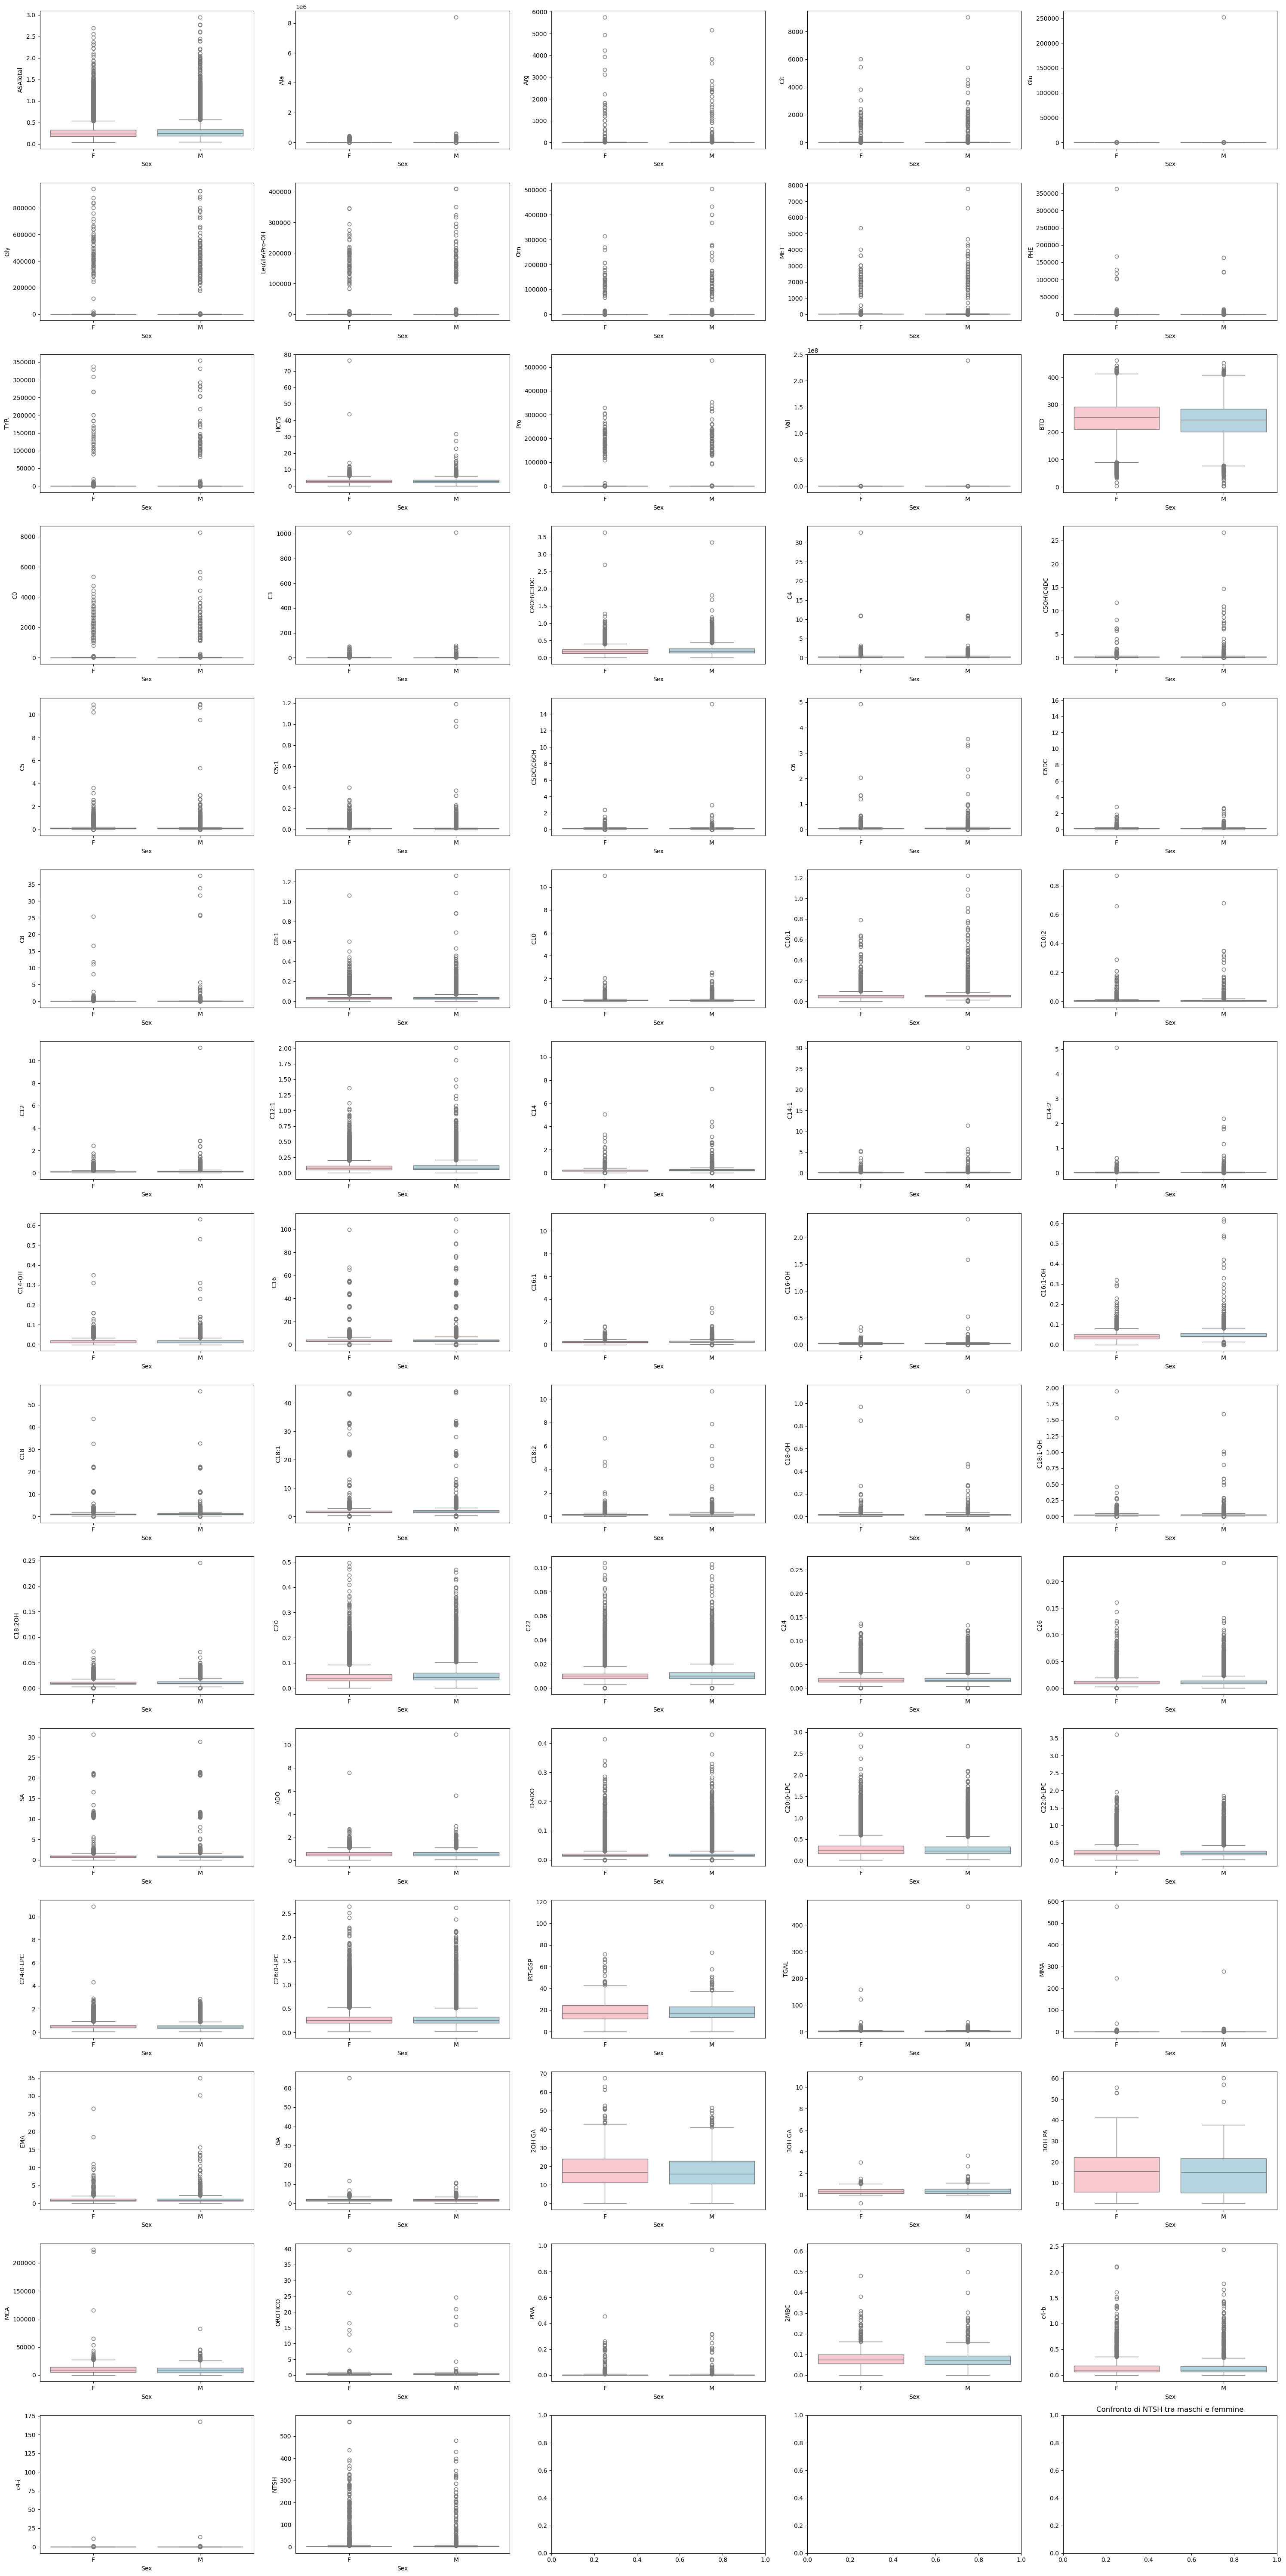

In [594]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

ciccionip = ciccioni.to_pandas()

for col in colonne_numeriche: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=ciccionip, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_grandi.png')
plt.tight_layout()

#### Distribution comparison

In [596]:
n1 = extra_piccoli.filter(pl.col('Diagnosis') != 'HEALTY').shape[0]

In [597]:
n2 = piccoli_pic.filter(pl.col('Diagnosis') != 'HEALTY').shape[0]

In [598]:
n3 = piccoli.filter(pl.col('Diagnosis') != 'HEALTY').shape[0]

In [599]:
n4 = ciccioni.filter(pl.col('Diagnosis') != 'HEALTY').shape[0]

In [600]:
p1 = round((n1/extra_piccoli.shape[0]) * 100, 2)
p2 = round((n2/piccoli_pic.shape[0]) * 100, 2)
p3 = round((n3/piccoli.shape[0]) * 100, 2) 
p4 = round((n4/ciccioni.shape[0]) * 100, 2)

In [601]:
data = {
    'Weight': ['< 1500', '1500 - 2000', ' 2000 - 2500', ' > 2500'],
    'Size': [extra_piccoli.shape[0], piccoli_pic.shape[0], piccoli.shape[0], ciccioni.shape[0]],
    'Positives': [n1, n2, n3, n4],
    'Percentage': [p1, p2, p3, p4]
}

# Creiamo il DataFrame
dati = pd.DataFrame(data)

In [602]:
dati.to_csv('dati.csv', index=False)

In [603]:
babies.shape

(791755, 102)

#### **Nice Table**

In [605]:
ciccioni.shape[0]

698052

In [606]:
piccoli.shape[0]

35527

In [607]:
extra_piccoli.shape[0]

5966

In [608]:
piccoli_pic.shape[0]

9172

In [609]:
from tabulate import tabulate

# Creazione di un DataFrame Polars
data = {
    'Weight': ['> 2500','2500-2000', '2000-1500', '1500 >'],
    'Size': [ciccioni.shape[0], piccoli.shape[0], piccoli_pic.shape[0], extra_piccoli.shape[0]]
}

df = pl.DataFrame(data)

# Converti Polars DataFrame in Pandas DataFrame per usare tabulate
df_pandas = df.to_pandas()

# Visualizza la tabella con il formato 'grid'
print(tabulate(df_pandas, headers='keys', tablefmt='grid', showindex=False))


+-----------+--------+
| Weight    |   Size |
+===========+========+
| > 2500    | 698052 |
+-----------+--------+
| 2500-2000 |  35527 |
+-----------+--------+
| 2000-1500 |   9172 |
+-----------+--------+
| 1500 >    |   5966 |
+-----------+--------+


In [610]:
babies_def2.shape

(748718, 100)

In [675]:
babies_def2['Diagnosis'].unique()

shape: (30,)
Series: 'Diagnosis' [str]
[
	"PKU"
	"CblA"
	"MTHFR"
	"ARG1"
	"3MCC"
	"VLCAD"
	"TFP EXITUS"
	"MCAD"
	"MMA"
	"BKT"
	"CPS1"
	"CblC"
	"GA1"
	"PHE"
	"ASA"
	"IVA"
	"IBG"
	"SCAD"
	"CUD"
	"CBS"
	"HEALTHY"
	"TYR3"
	"ARG"
	"CPT2"
	"2MBG"
	"PA"
	"HPA"
	"GA2"
	"CblD"
	"CIT1"
]